## Proyecto Integrador

#### 1° avance:

**Carga y transformación de los datos**

In [6]:
# Carga de librerias
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv("ProyectoIntegradorM4/data_latinoamerica.csv",sep=',')

In [3]:
data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
np.shape(data)

(12216057, 50)

In [5]:
data.shape

(12216057, 50)

In [6]:
# Selecciono los 6 países que se han propuesto para el análisis. 
paises_seleccionados = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]

In [7]:
np.shape(data_latinoamerica)

(11970289, 50)

In [8]:
# Verifico datos faltantes y limpio los datos donde tenga mas de 4 millones de faltantes
data_latinoamerica.isnull().sum()

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


In [9]:
# Verifico cuales columnas tienen mas de 4 millones de faltantes con una mascara
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [10]:
# Nuevo filtro segun "location_key" para los paises requeridos
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

In [11]:
np.shape(data_latinoamerica_paises)

(5946, 50)

Para facilidad y comprensiòn de los datos, vamos a tomar los datos a partir de la fecha 2021-01-01, ya que es la fecha en la que se empezaron a registrar mejor los datos.

In [12]:

data_latinoamerica_paises_Fecha = data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

In [13]:
data_latinoamerica_paises_Fecha.shape

(3744, 50)

Con el nuevo filtro vamos a ver que cantidad de elementos tenemos vacios, en caso de tenerlos, debemos proceder a eliminarlos.

In [14]:
valores_nulos_fecha = data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]
valores_nulos_fecha

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64

In [15]:
paises_seleccionados

['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

In [16]:
# Usamos un for para completar los valores nulos de las columnas con la media de cada país.
for pais in paises_seleccionados:
    data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
    data_latinoamerica_paises_Fecha['new_deceased'] = data_latinoamerica_paises_Fecha['new_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_deceased'].mean())
    data_latinoamerica_paises_Fecha['cumulative_confirmed'] = data_latinoamerica_paises_Fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_confirmed'].mean())
    data_latinoamerica_paises_Fecha['cumulative_deceased'] = data_latinoamerica_paises_Fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_deceased'].mean())
    data_latinoamerica_paises_Fecha['rainfall_mm'] = data_latinoamerica_paises_Fecha['rainfall_mm'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_Fecha['relative_humidity'] = data_latinoamerica_paises_Fecha['relative_humidity'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['relative_humidity'].mean())
    data_latinoamerica_paises_Fecha['average_temperature_celsius'] = data_latinoamerica_paises_Fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['minimum_temperature_celsius'] = data_latinoamerica_paises_Fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['maximum_temperature_celsius'] = data_latinoamerica_paises_Fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['maximum_temperature_celsius'].mean())

# Llenar Nan con el valore de 0 en la columna new_recovered,cumulative_recovered,cumulative_vaccine_doses_administered para hacer analisis de estos datos.
data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(0)


C:\Users\mariu\AppData\Local\Temp\ipykernel_21968\2774475471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
C:\Users\mariu\AppData\Local\Temp\ipykernel_21968\2774475471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_deceased'] = data_latinoameric

In [17]:
# Verifico que se hizo completa la imputacion
data_latinoamerica_paises_Fecha.isnull().sum()

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

In [18]:
# Verifico dimensiones nuevas
print(data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_Fecha))

Series([], dtype: int64)
(3744, 50)


Guardamos el dataset filtrado por fecha en un archivo csv para poderlo utilizar en el analisis.

In [19]:
data_latinoamerica_paises_Fecha.to_csv("ProyectoIntegradorM4/DatosFinalesFiltrado.csv",index=False)

Podemos reiniciar el notebook para liberar memoria y cargar el archivo filtrado para continuar con el análisis.

In [1]:
import pandas as pd

In [2]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv",sep=',')
data_latinoamerica_paises.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [3]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('---------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------------
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.00

In [4]:
data_latinoamerica_paises.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13930.531008    276.363237          6.780429e+06        192646.443778   
std     24205.550042    507.133193          7.977327e+06        182624.944321   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59390.500000   
50%      5227.000000    101.000000          3.648782e+06        139496.500000   
75%     14812.750000    311.000000          6.202104e+06        214877.250000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9.247680e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.618297e+06  2.938188e+07     1.445076e+07   
50%                             3.244576e+07  4.791080e+07     2.225416e+07   
75%                             7.478108e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
std                      1.665972   23

Como complemento extra vamos a crear una función que nos entregue valores que el metodo describe no nos entrega, como la moda, mediana, el Rango, la varianza.

In [6]:
# crea un funcion  que solo muestre los valores numericos y no los valores categoricos, ademas solo da la media,median y la desviacion estandar.
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Mediana:',data[i].median())
            print('varianza:',data[i].var())
            print('Rango', data[i].max()-data[i].min())
            print("Moda",data[i].mode())
            print('---------------------------------')

describir_datos(data_latinoamerica_paises)

new_confirmed
Mediana: 5227.0
varianza: 585908652.8478458
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
Mediana: 101.0
varianza: 257184.0754690855
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
---------------------------------
cumulative_confirmed
Mediana: 3648782.0
varianza: 63637740447227.74
Rango 34567862.0
Moda 0    6.079579e+06
Name: cumulative_confirmed, dtype: float64
---------------------------------
cumulative_deceased
Mediana: 139496.5
varianza: 33351870288.323883
Rango 685202.0
Moda 0    105716.119355
Name: cumulative_deceased, dtype: float64
---------------------------------
cumulative_vaccine_doses_administered
Mediana: 32445756.5
varianza: 8551958275078892.0
Rango 347868481.0
Moda 0    0.0
Name: cumulative_vaccine_doses_administered, dtype: float64
---------------------------------
population
Mediana: 47910798.0
varianza: 4507478439615793.0
Rango 194985406.0
Moda 0     17574003.0
1     2938

**EXTRA CREDIT**

In [31]:
# Uso de funciones de orden superior
# Filtrar países con más de 5 millones de casos
# Agrupar por país y sumar los casos confirmados
total_casos_por_pais = data_latinoamerica_paises.groupby('country_name')['new_confirmed'].sum()

# Filtrar países con más de 100,000 casos
paises_filtrados = total_casos_por_pais[total_casos_por_pais > 5000000]

# Obtener los nombres de los países seleccionados
paises_seleccionados2 = list(paises_filtrados.index)

# Mostrar la lista final
print(paises_seleccionados2)

['Argentina', 'Brazil', 'Mexico']


In [23]:
# Clasificar los países según incidencia
# Agrupar por país y sumar los casos confirmados
total_casos_por_pais = data_latinoamerica_paises.groupby('country_name')['new_confirmed'].sum()

# Clasificar países según incidencia
niveles_incidencia = total_casos_por_pais.map(lambda x: 'Alta' if x > 5000000 else 'Baja')

# Convertir el resultado a un DataFrame
clasificacion_incidencia = niveles_incidencia.reset_index(name='Nivel_Incidencia')

# Mostrar la clasificación
print(clasificacion_incidencia)


  country_name Nivel_Incidencia
0    Argentina             Alta
1       Brazil             Alta
2        Chile             Baja
3     Colombia             Baja
4       Mexico             Alta
5         Peru             Baja


In [27]:
# Agrupar por país y calcular el total de casos confirmados
total_casos_por_pais = data_latinoamerica_paises.groupby('country_name')['new_confirmed'].sum()

# Crear un DataFrame con el total de incidencias
clasificacion_incidencia = total_casos_por_pais.reset_index(name='Total_Incidencias')

# Convertir el total de incidencias a millones (MM)
clasificacion_incidencia['Total_Incidencias(MM)'] = clasificacion_incidencia['Total_Incidencias'] / 1_000_000

# Clasificar países según incidencia
clasificacion_incidencia['Nivel_Incidencia'] = clasificacion_incidencia['Total_Incidencias'].map(
    lambda x: 'Alta' if x > 5_000_000 else 'Baja'
)

# Ordenar por el total de incidencias en orden descendente
clasificacion_incidencia = clasificacion_incidencia.sort_values(by='Total_Incidencias', ascending=False)

# Seleccionar columnas relevantes para mostrar
clasificacion_incidencia = clasificacion_incidencia[['country_name', 'Total_Incidencias(MM)', 'Nivel_Incidencia']]

# Mostrar el DataFrame resultante
print(clasificacion_incidencia)


  country_name  Total_Incidencias(MM) Nivel_Incidencia
1       Brazil              26.894078             Alta
0    Argentina               8.056705             Alta
4       Mexico               5.549906             Alta
3     Colombia               4.644243             Baja
2        Chile               3.839378             Baja
5         Peru               3.171600             Baja


#### 2° avance:

In [9]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import warnings
warnings.filterwarnings("ignore")
# esto ignora las advertencias de que algo se va a deprecar

**Reinicio y cargo archivo nuevamente para que no afecten los cambios realizados en Extra Credits**

In [39]:
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

In [40]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [41]:
# Uso un ciclo for para recorrer las columnas y obtener la media, mediana, desviación estandar, mínimo y máximo de cada columna.
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('---------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------------
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.00

In [42]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

In [43]:
# Coloco como indice la columna "Date" para poder hacer un análisis de los datos a lo largo del tiempo.
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)
data_latinoamerica_paises.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

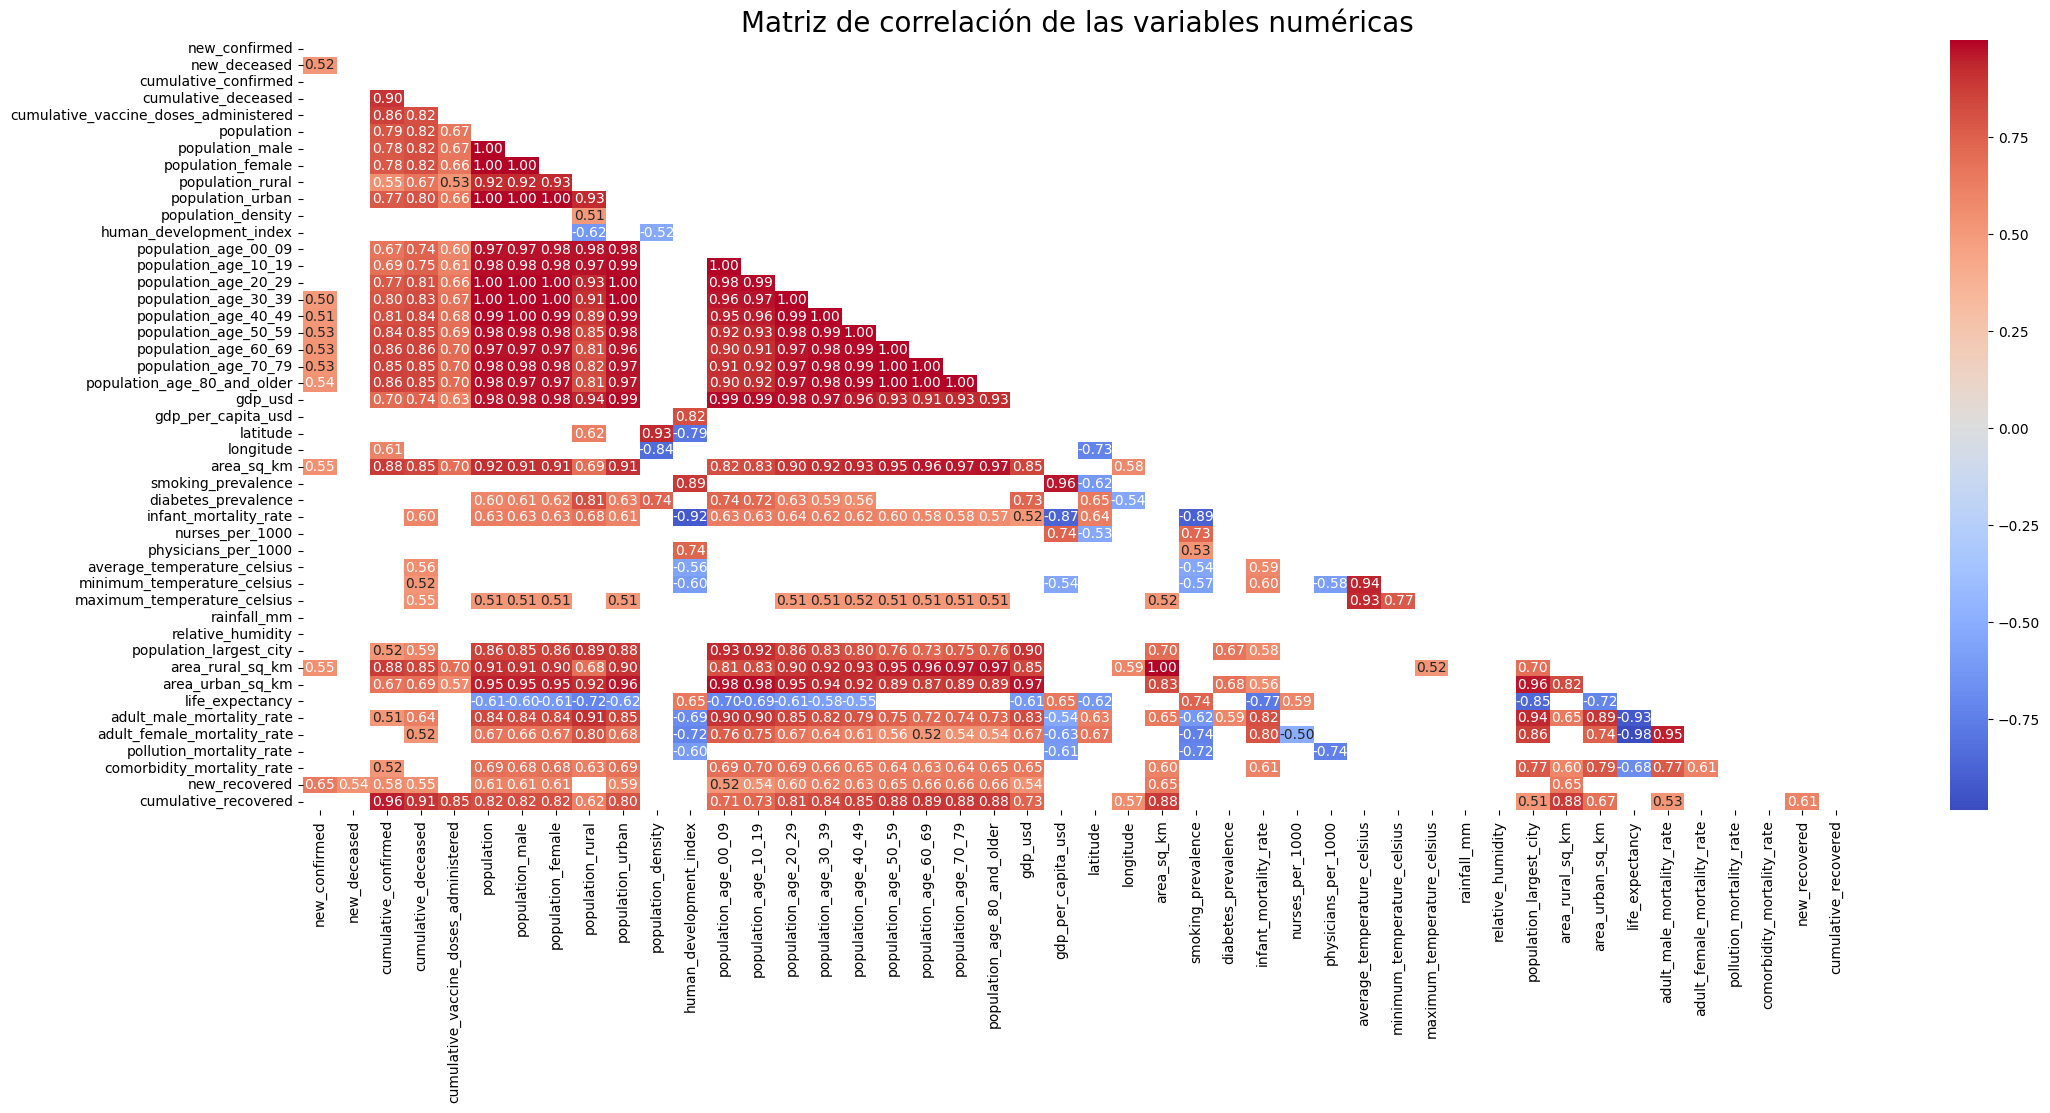

In [44]:
#Se crea la matriz de correlación para ver si existe relacion entre las variables numéricas
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()

#Aquí se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Vamos a mostrar valores superiores a 0.5 es decur donde hay una correlación fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

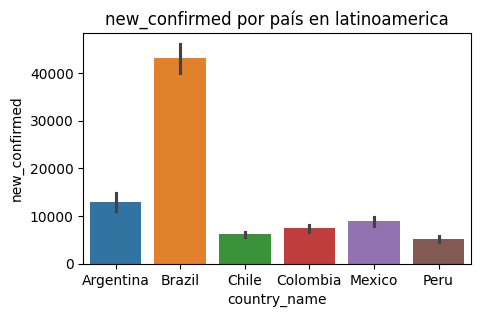

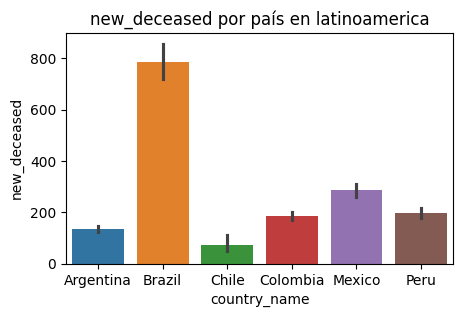

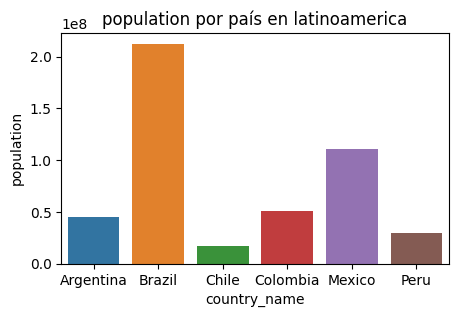

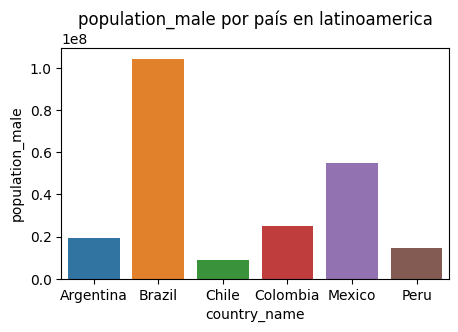

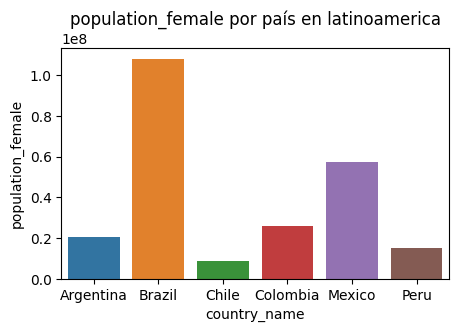

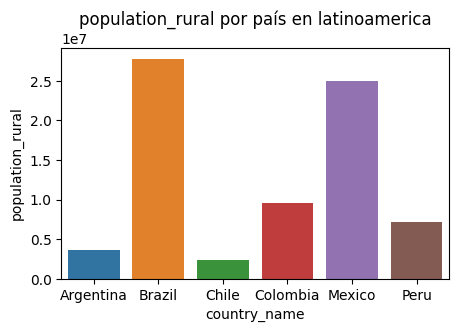

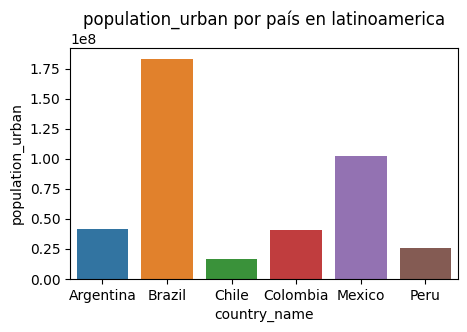

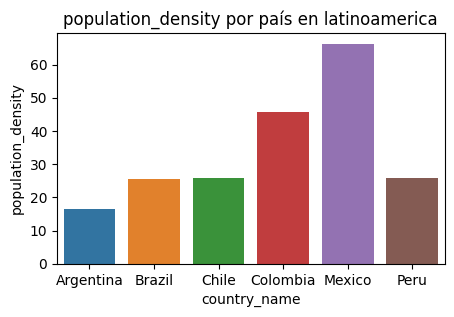

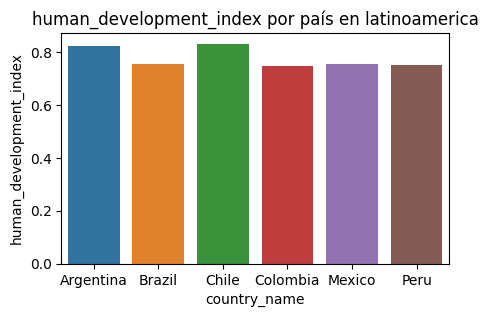

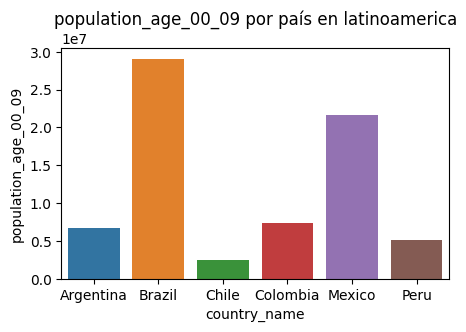

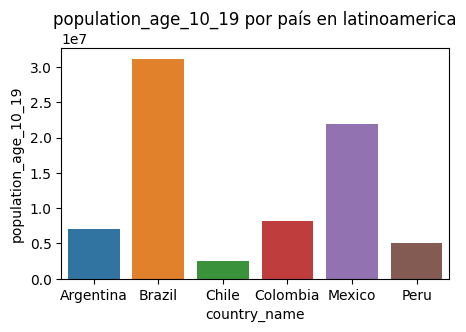

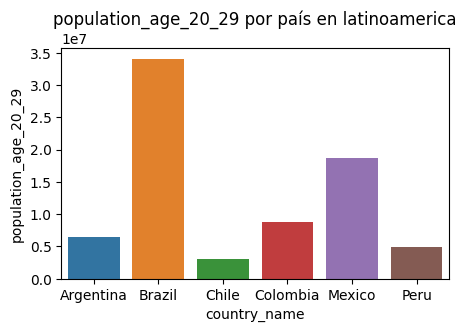

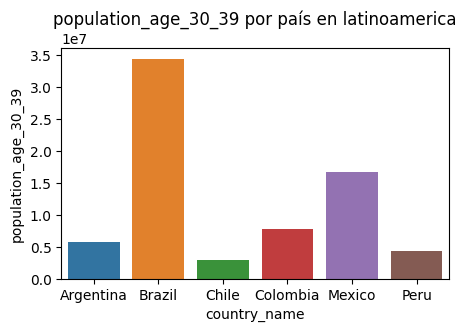

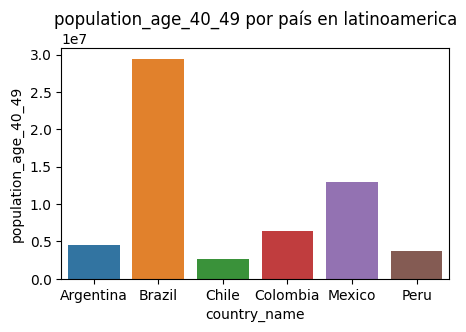

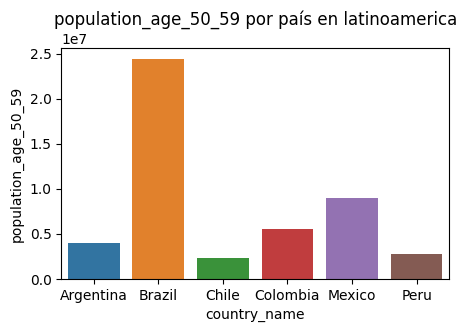

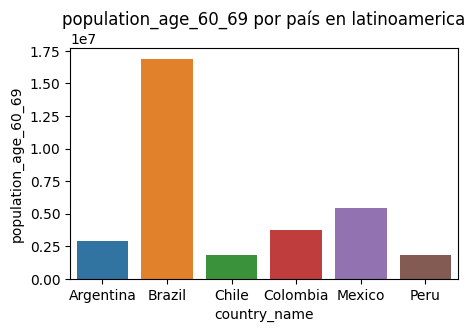

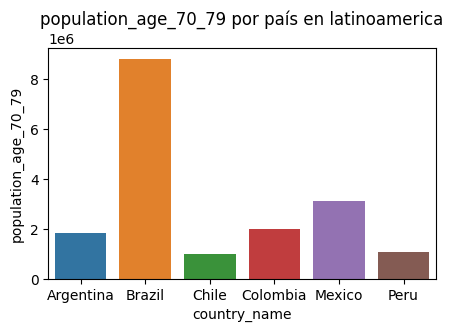

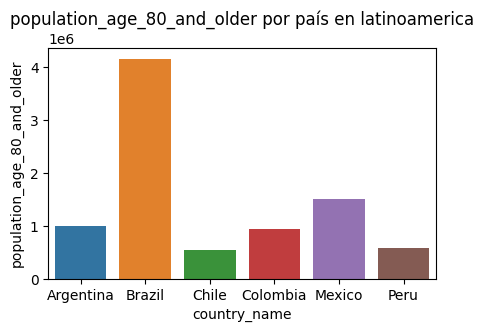

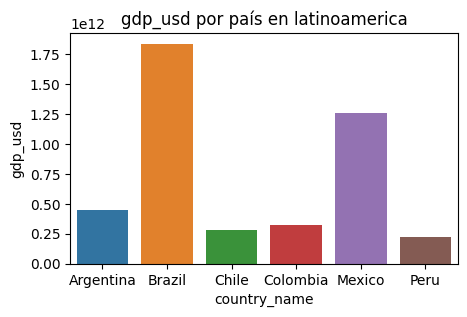

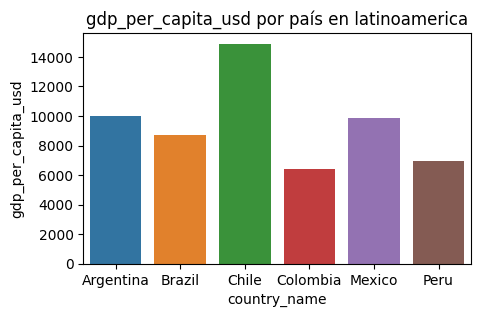

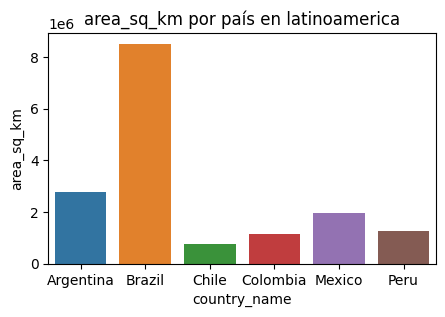

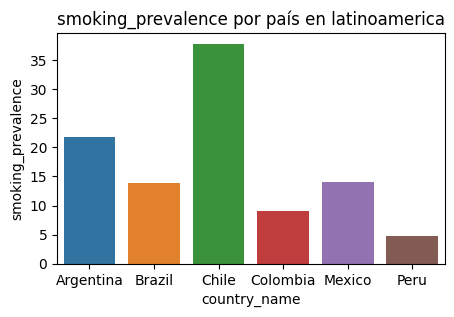

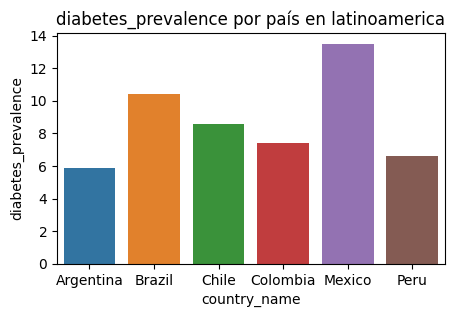

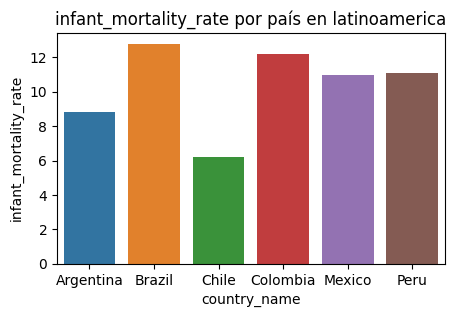

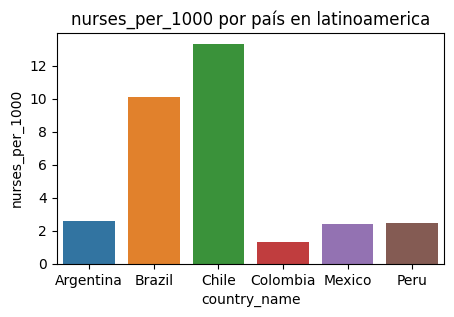

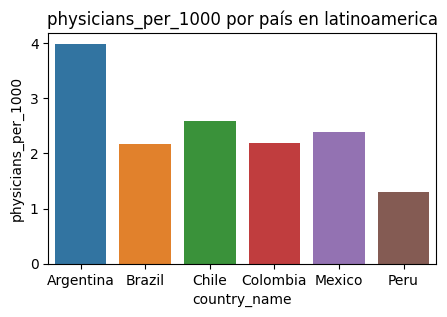

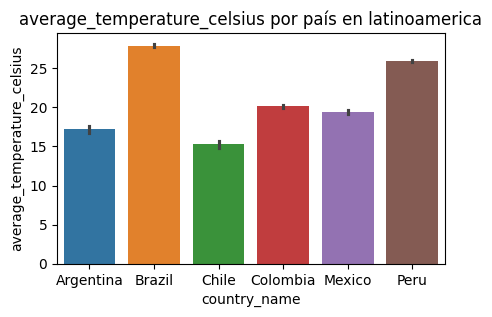

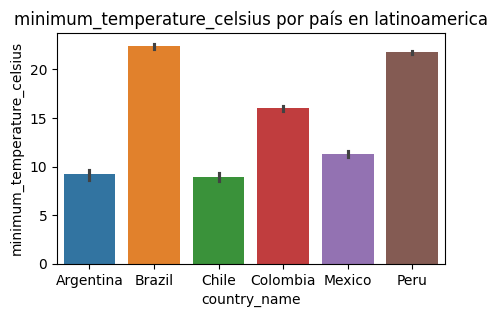

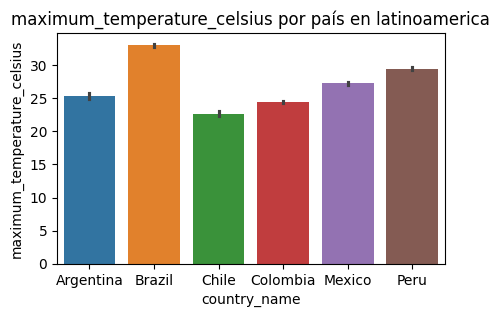

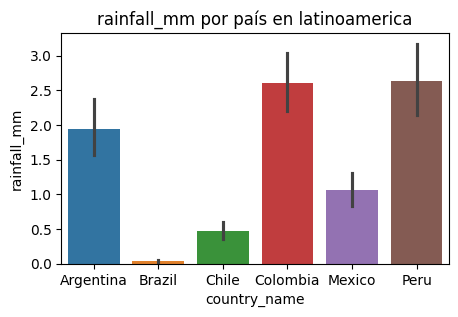

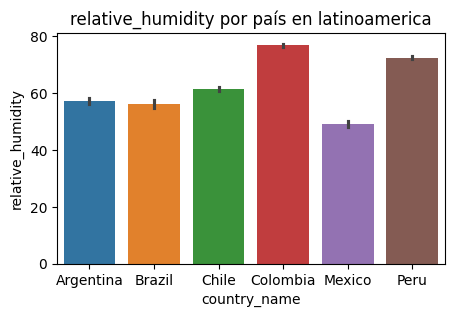

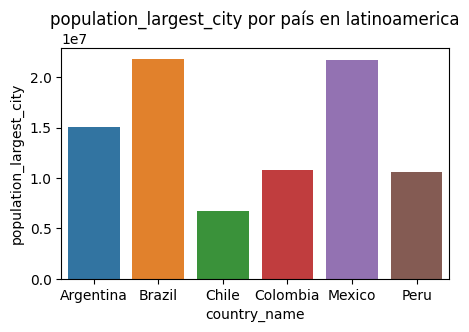

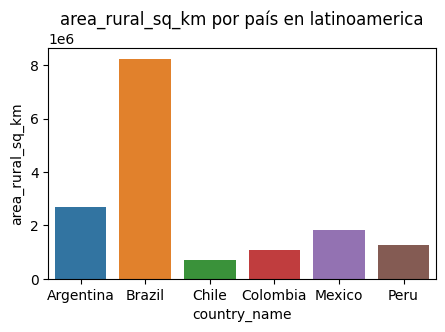

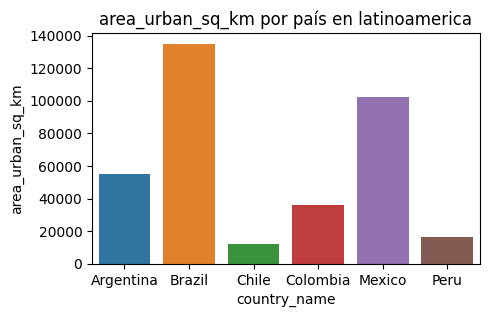

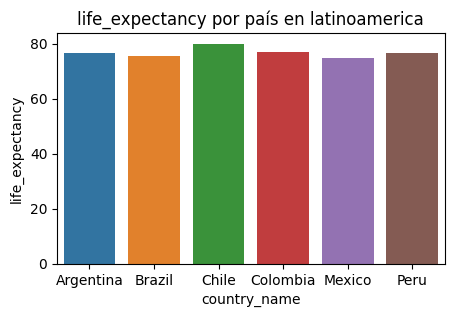

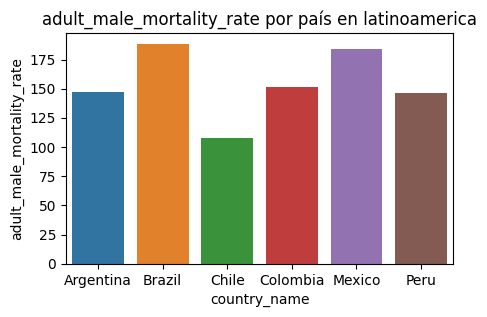

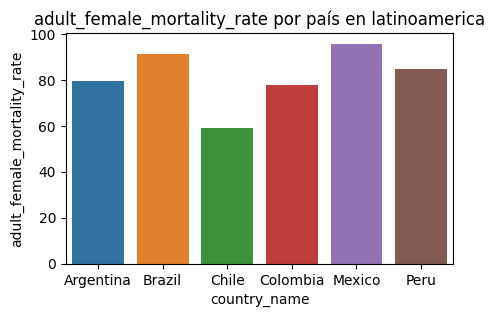

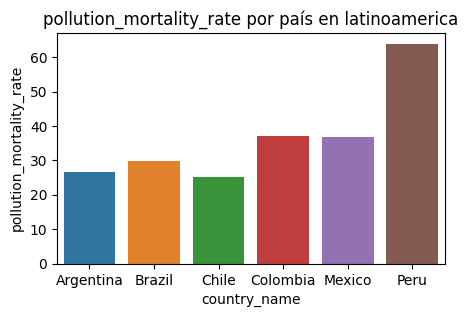

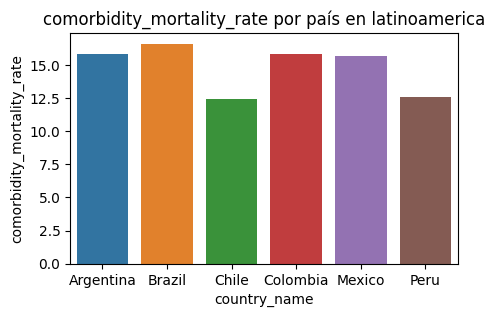

In [45]:
# Utilizo barplots mediante un ciclo for y la librería seabornpara verificar distribucion de varias variables a la vez
data_latinoamerica_paises = data_latinoamerica_paises.reset_index()
# diagrams bar for evere country in data_latinoamerica_paises with 6 columns
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered','new_recovered']:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax, hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

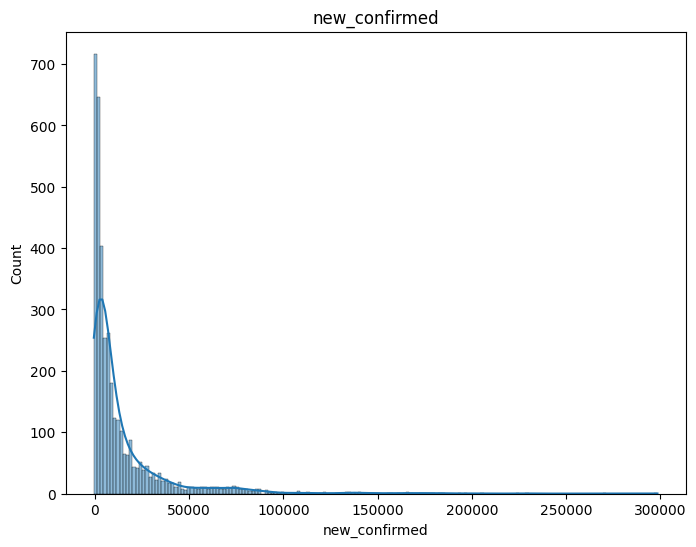

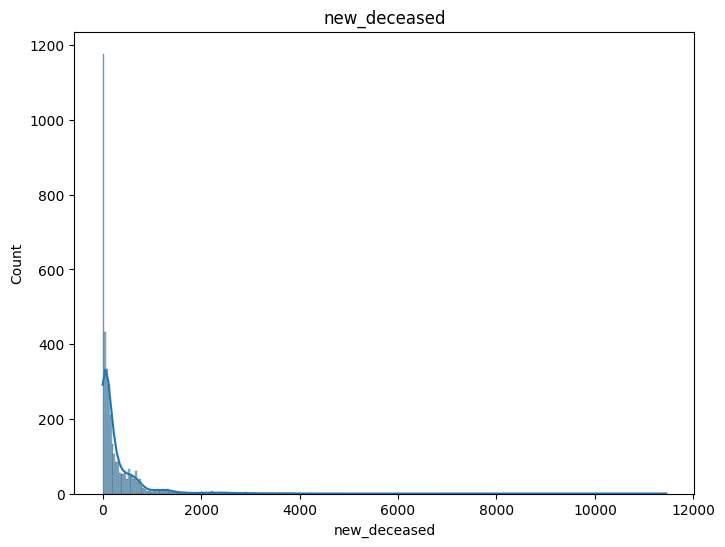

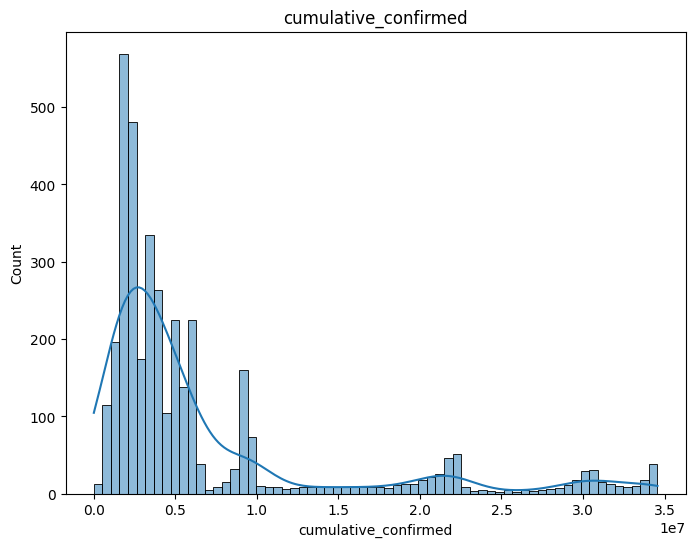

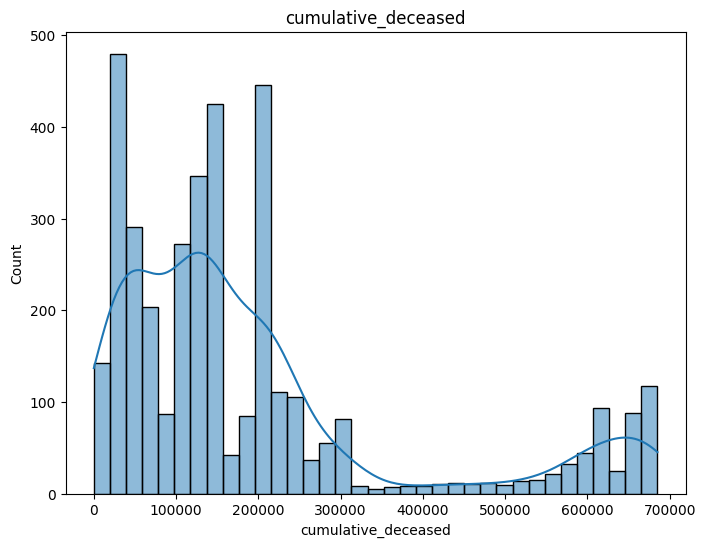

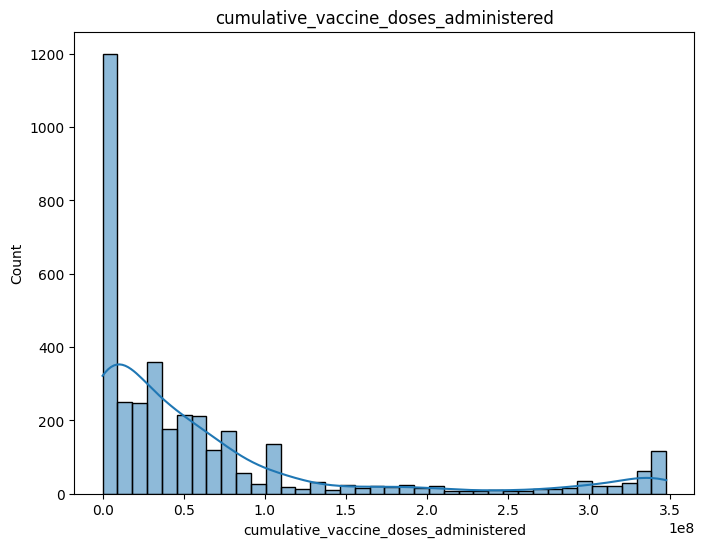

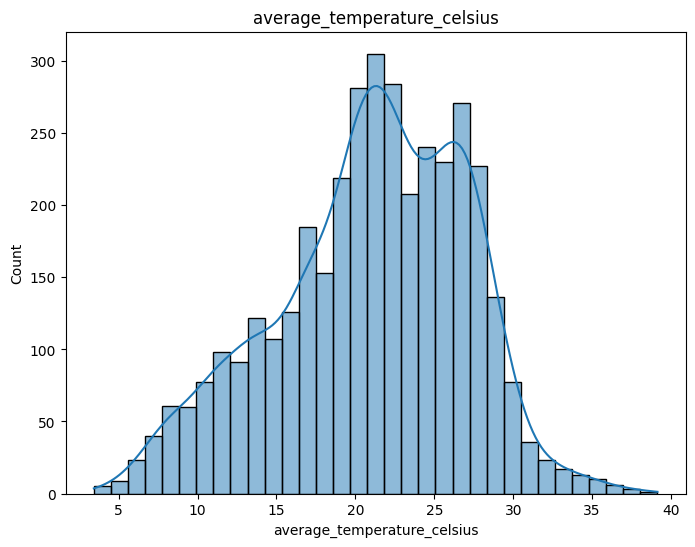

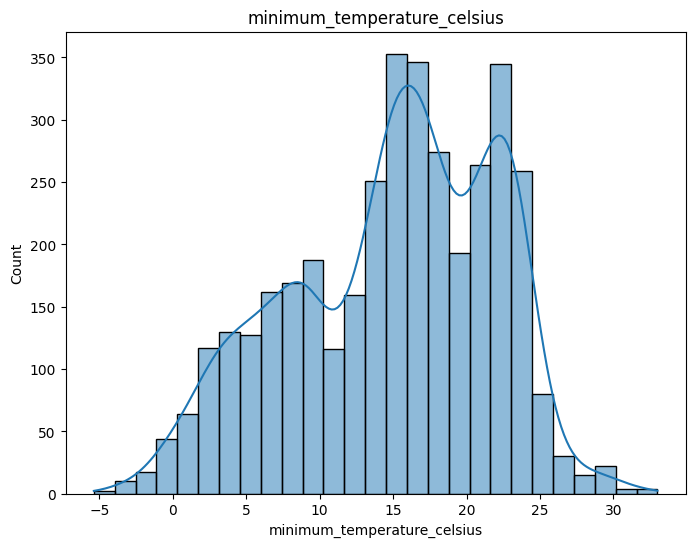

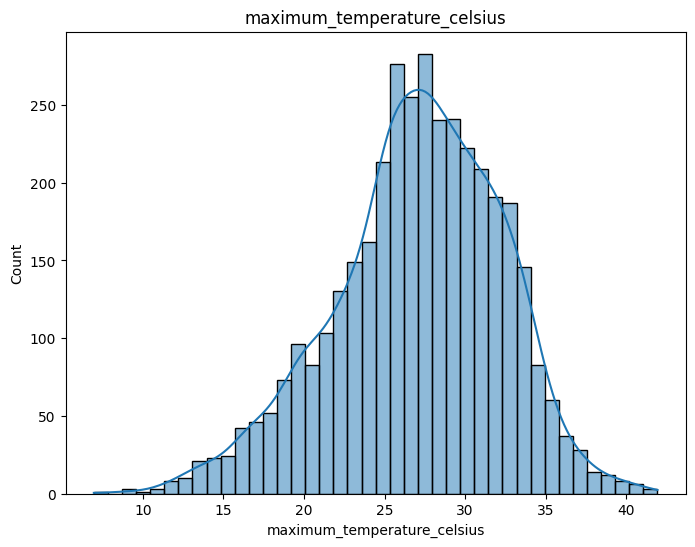

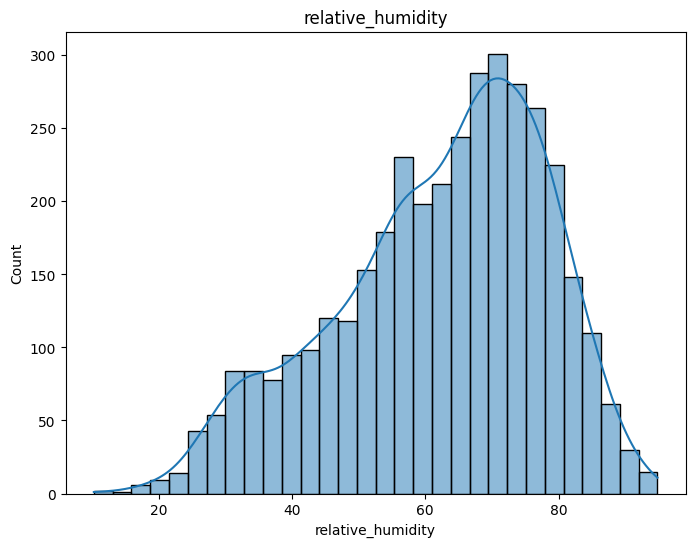

In [46]:
# Se repite el proceso con un ciclo for pero ahora vamos a realizar histogramas para ver la distribución de algunos de los datos solicitados.
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                  "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                  "maximum_temperature_celsius","relative_humidity"]

# Crear histogramas de las variables numéricas
for i in data_latinoamerica_paises[lista_columnas_6]:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(data_latinoamerica_paises[i], kde=True)
    plt.title(i)
    plt.show()

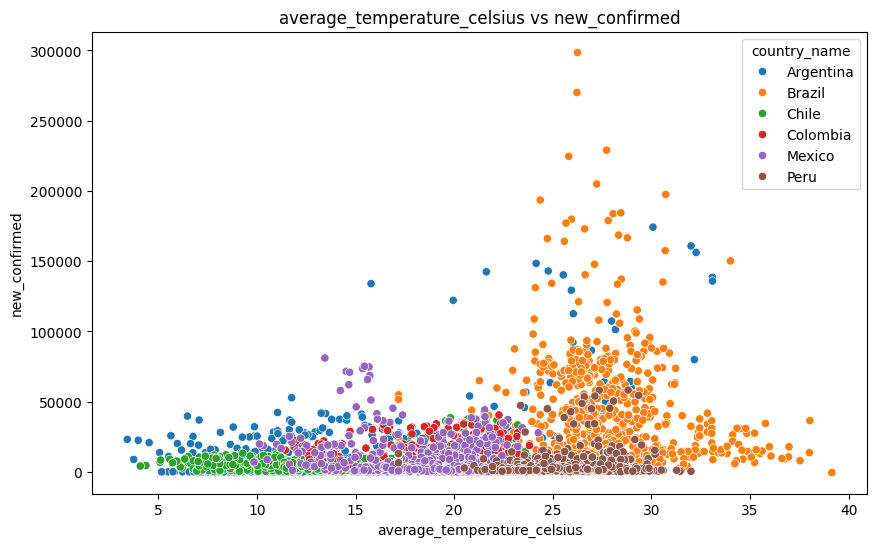

In [47]:
# Analizar la variable average_temperature y la variable new_confirmed, para entender el comportamiento de los casos 
# respecto a la temperatura,usando scatter plot
# Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()


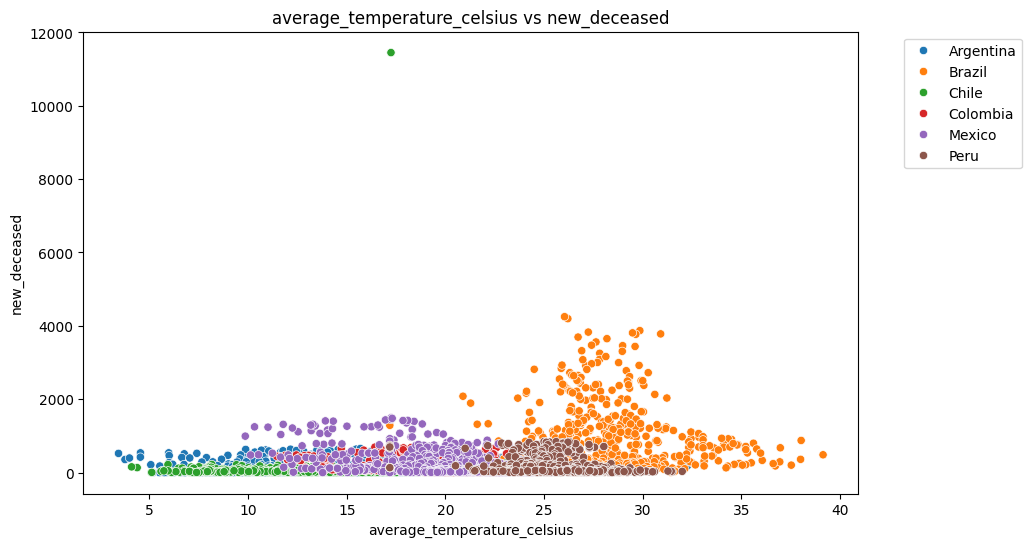

In [48]:
# Análisis de la temperatura promedio con la cantidad de muertes.
# Grafica de average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [49]:
# Analizar las dosis administradas por mes en TODOS los países.
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

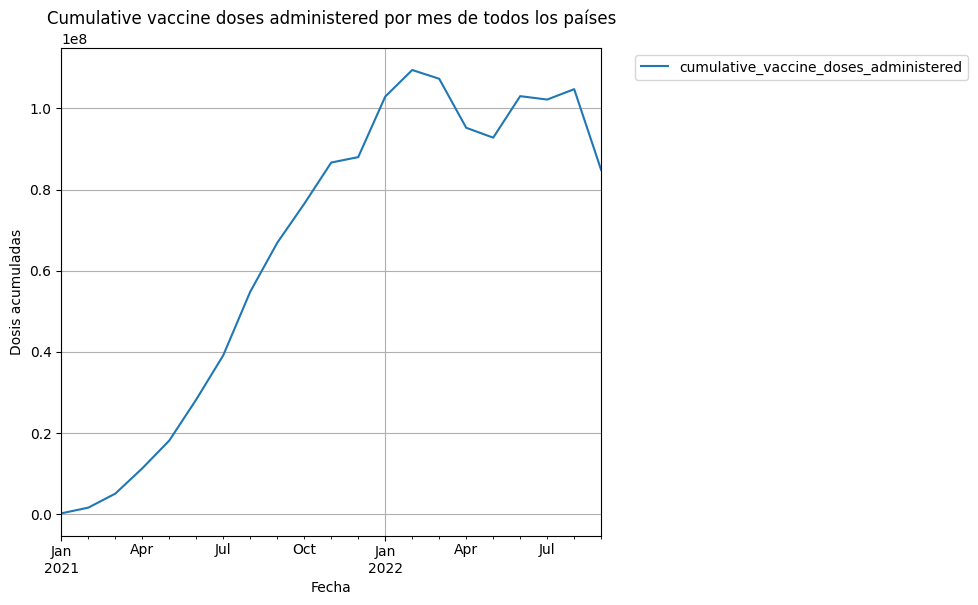

In [53]:
# Gráfica de valores medios de cumulative_vaccine_doses_administered por mes
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Cumulative vaccine doses administered por mes de todos los países')
plt.xlabel('Fecha')
plt.ylabel('Dosis acumuladas')
plt.grid()
plt.tight_layout()
plt.show()


En la anterior gráfica se puede observar que la cantidad de dosis administradas en los países seleccionados ha ido aumentando a lo largo del tiempo.

Como la anterior gráfica es una información general, vamos a realizar un análisis más detallado de las dosis administradas por mes en cada país.

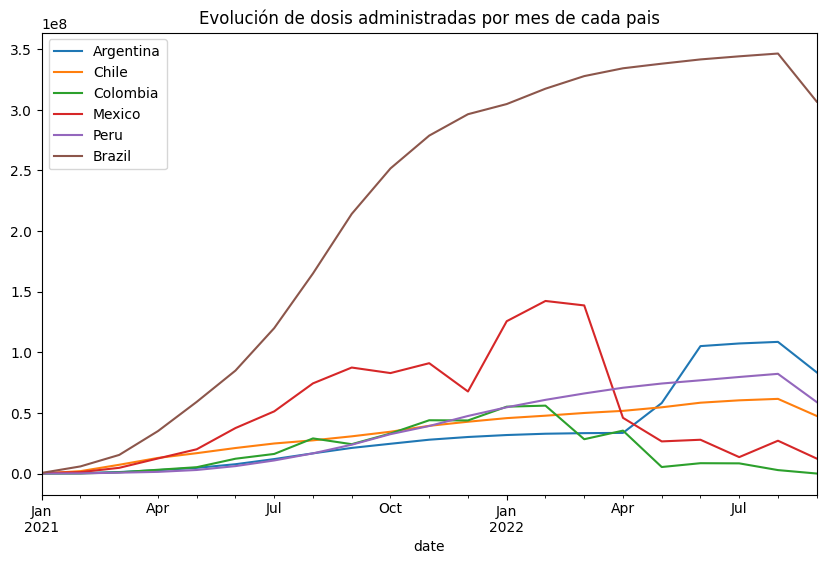

In [54]:
# análisis más detallado de las dosis administradas por mes en CADA país.
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

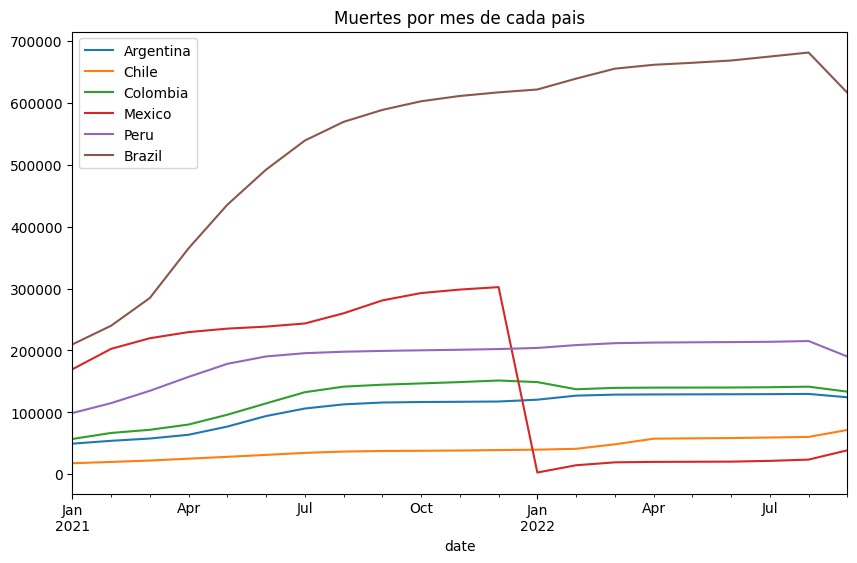

In [55]:
# Análisis de cantidad de muertes por cada país
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

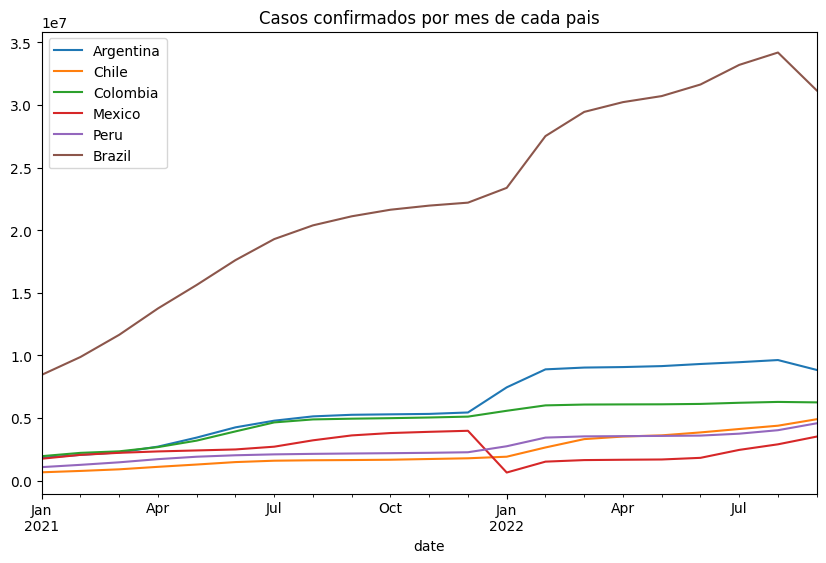

In [56]:
# Análisis de casos confirmados por mes en cada pais
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

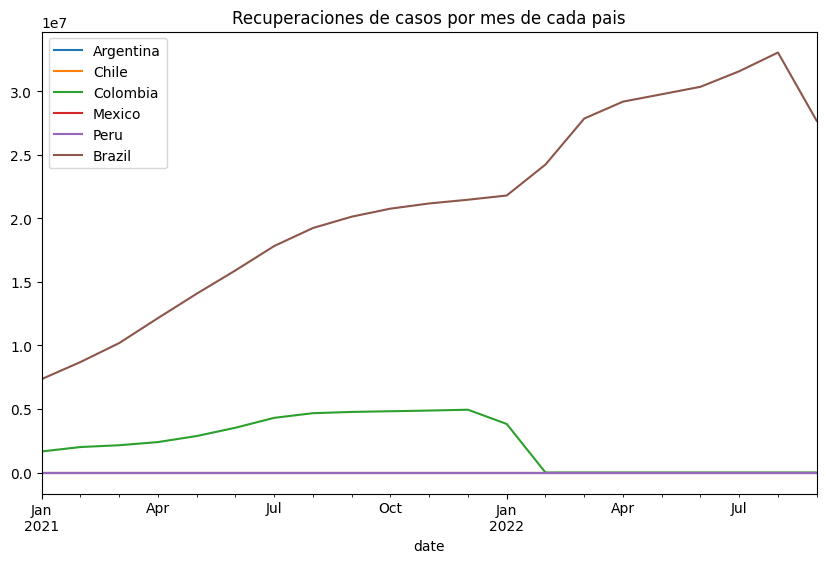

In [58]:
# Recuperaciones por mes en cada pais
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

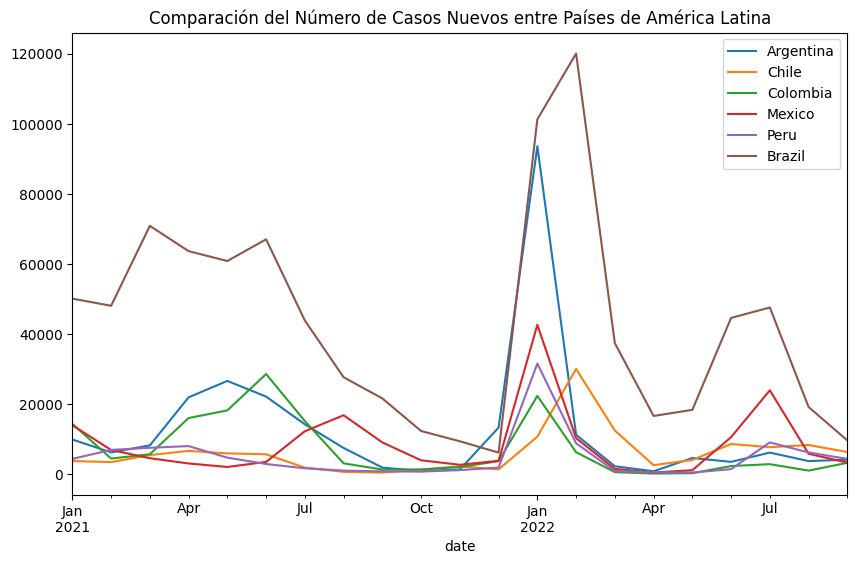

In [59]:
# Análisis de número de casos nuevos en cada país
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('M').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

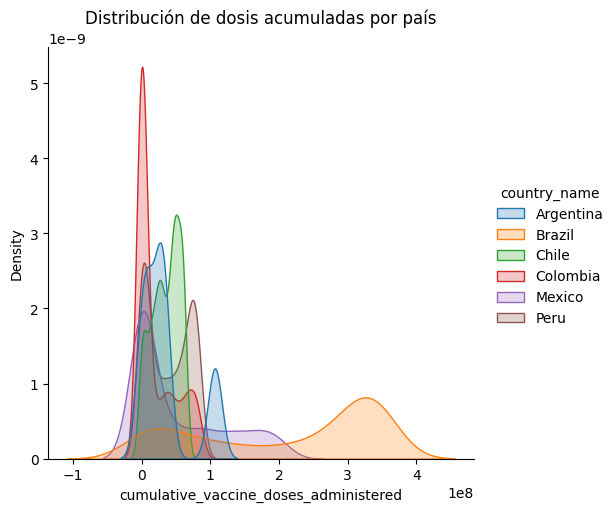

In [60]:
# Distribución de dosis acumuladas por país
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

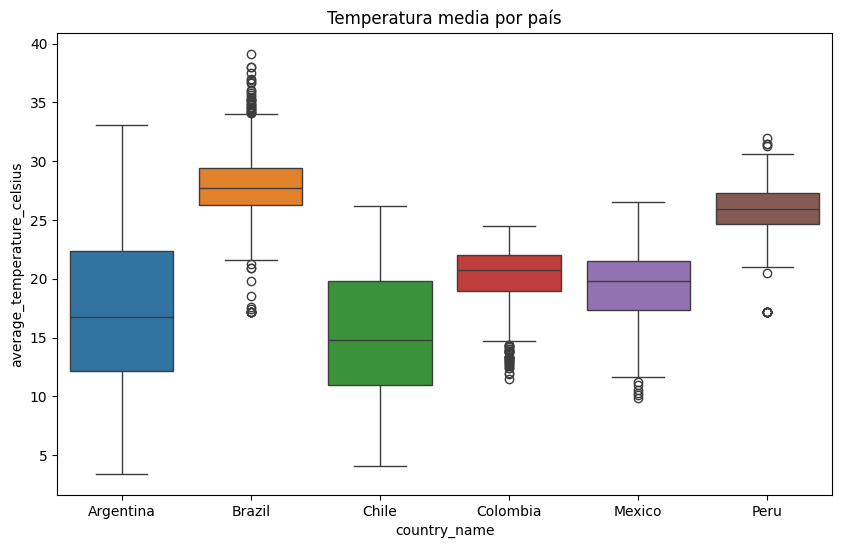

In [61]:
# Analisis de promedio de temperatura en cada pais usando poxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
plt.title('Temperatura media por país')
plt.show()

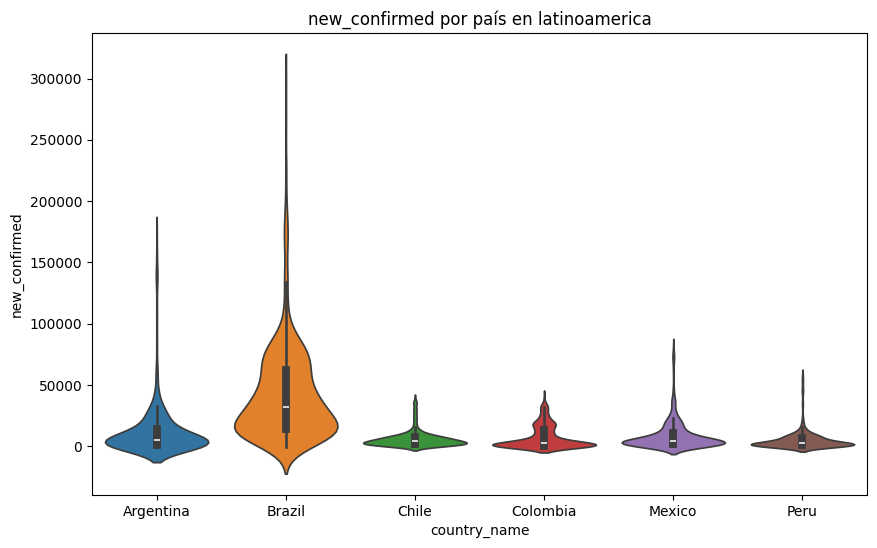

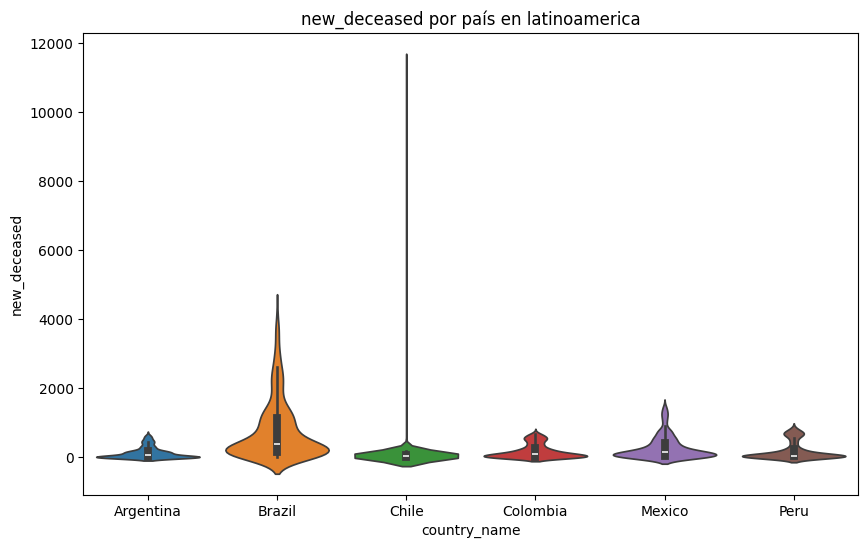

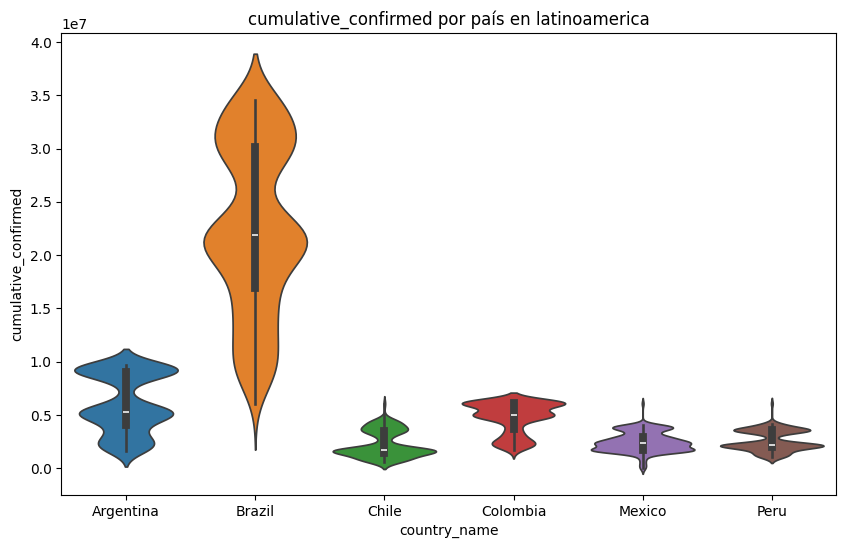

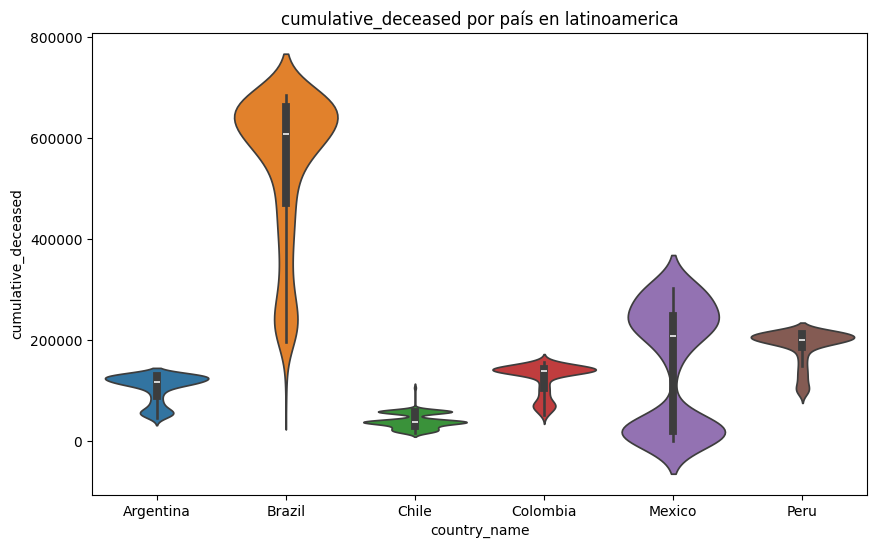

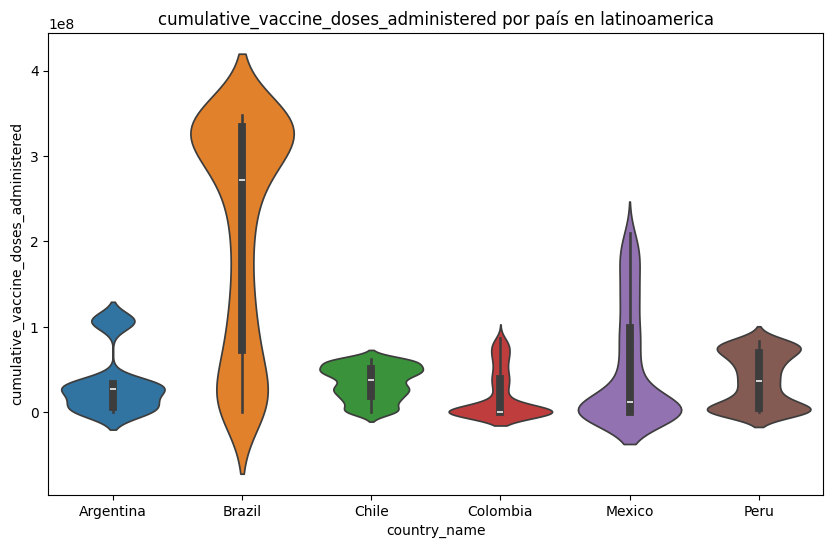

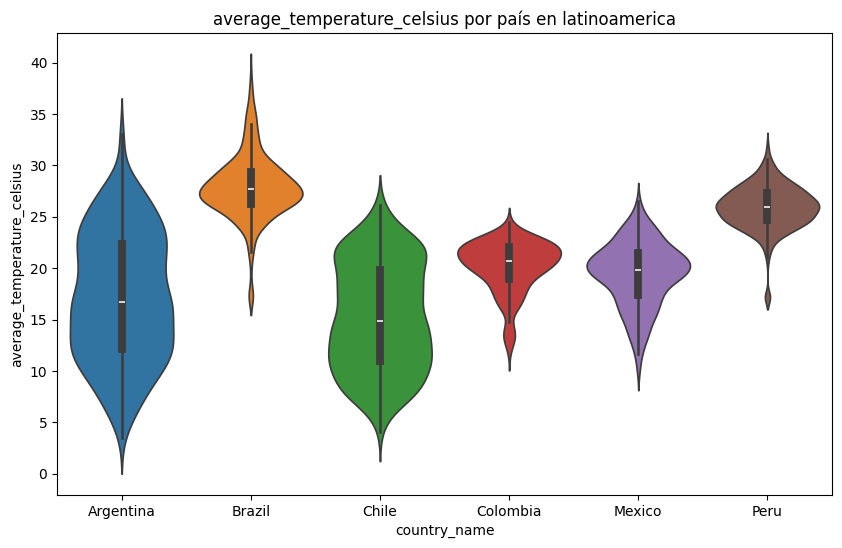

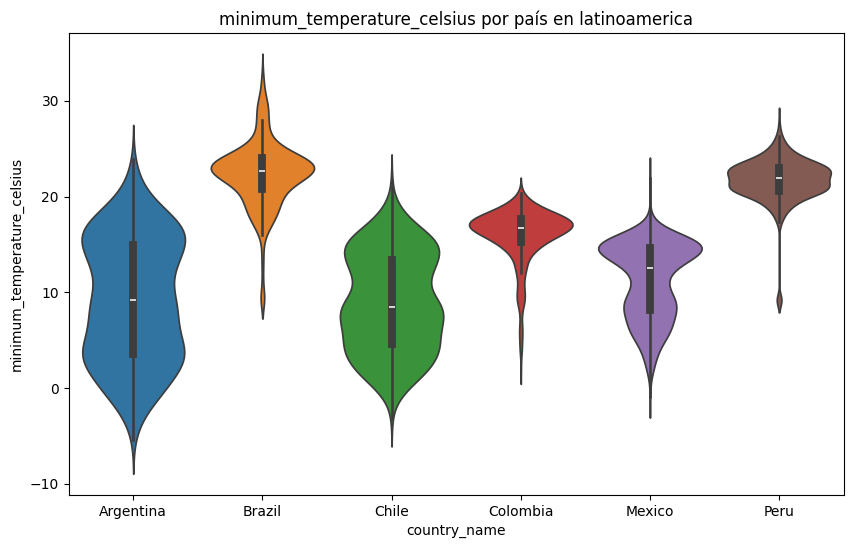

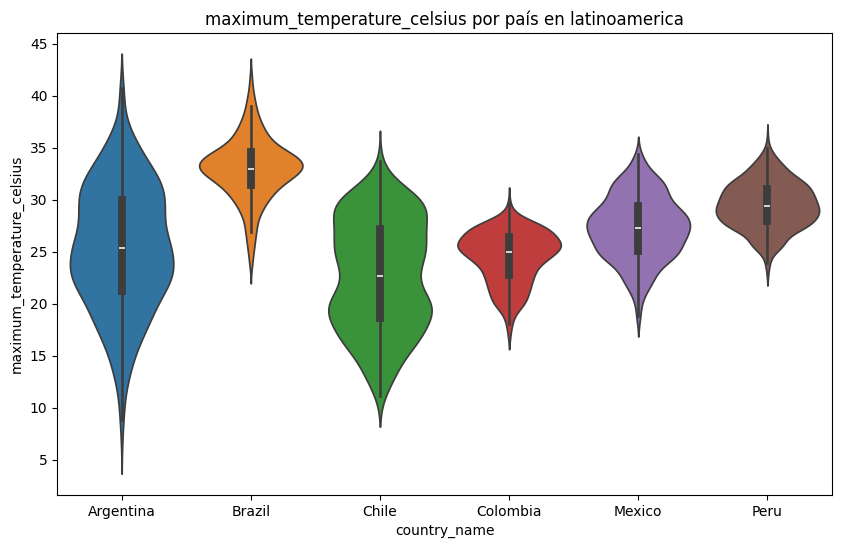

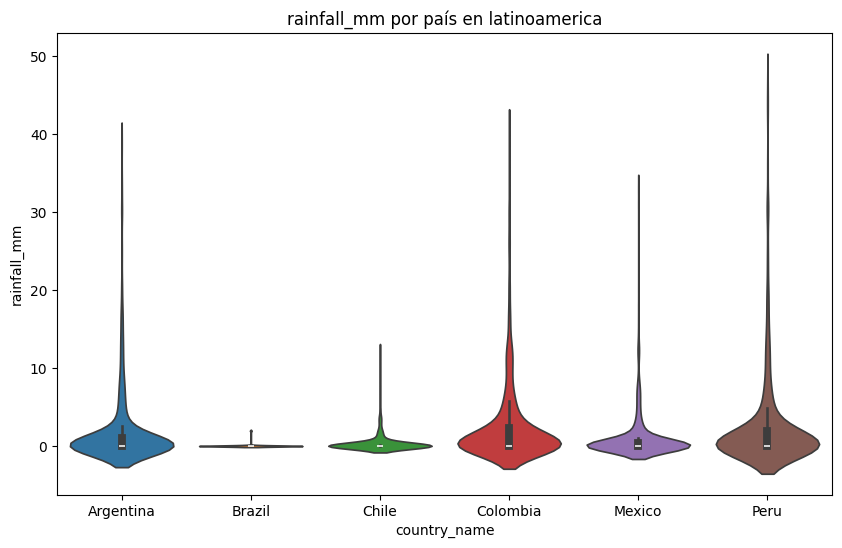

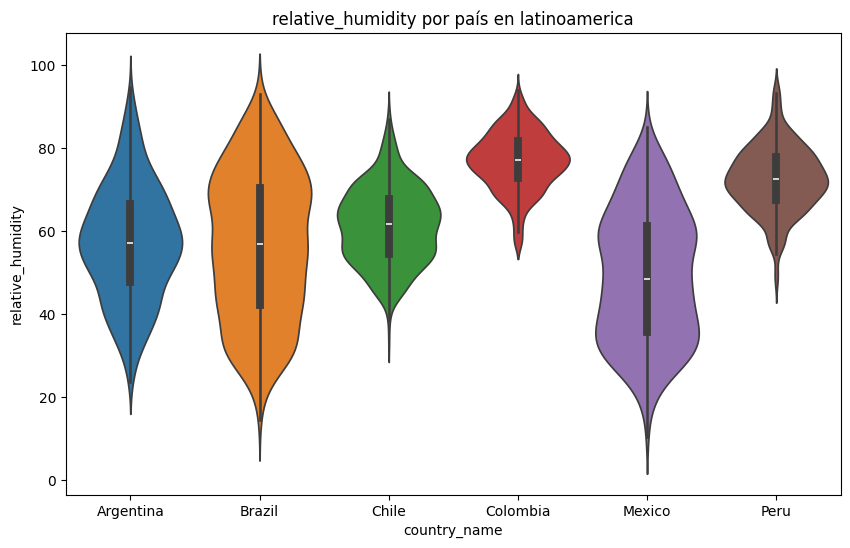

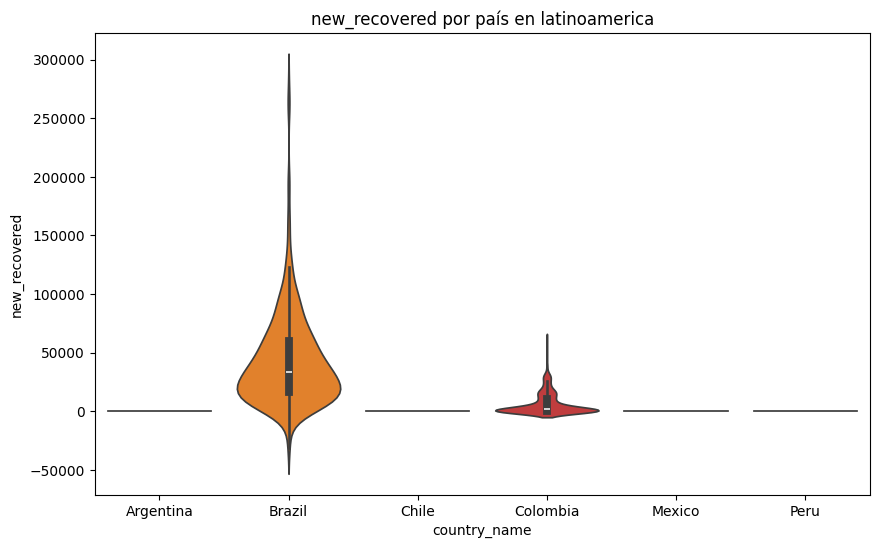

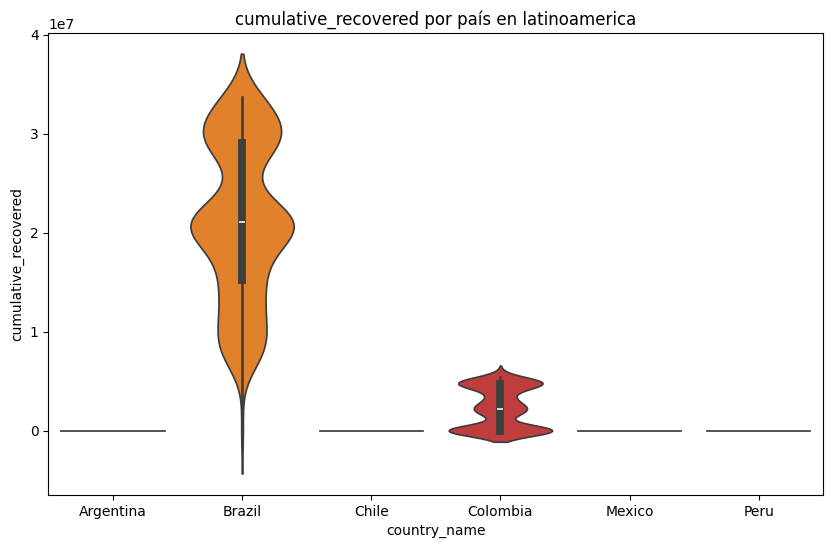

In [62]:
# Uso de violinplot para mejorar la observacion de la distribucion de los datos
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]


# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

**ANALISIS DE EDADES**

In [64]:
# Coloco todos los datos flotantes con 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format)

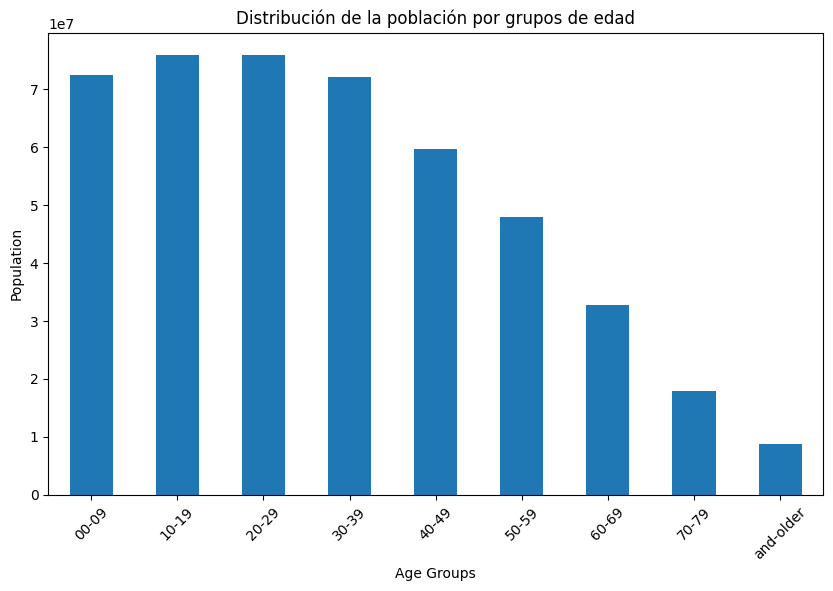

In [65]:
# Calculamos la distribucion de la poblacion por grupos de edad

cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

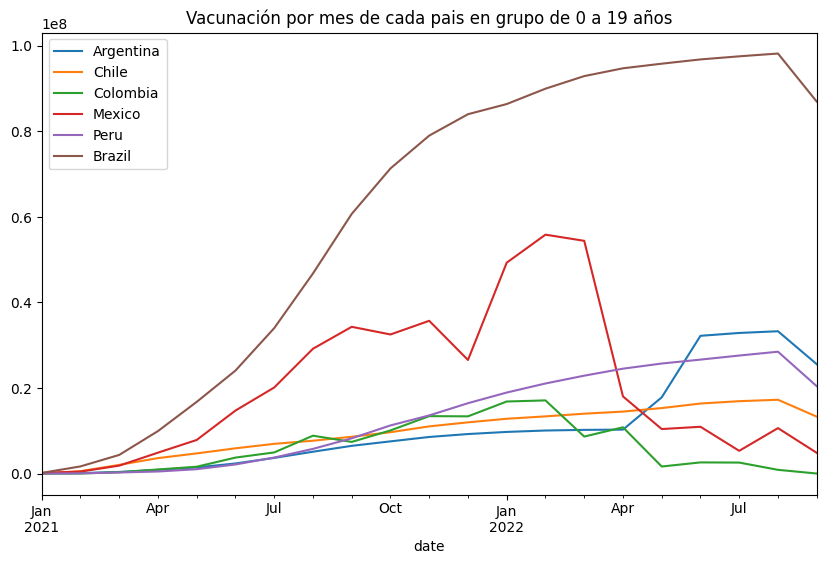

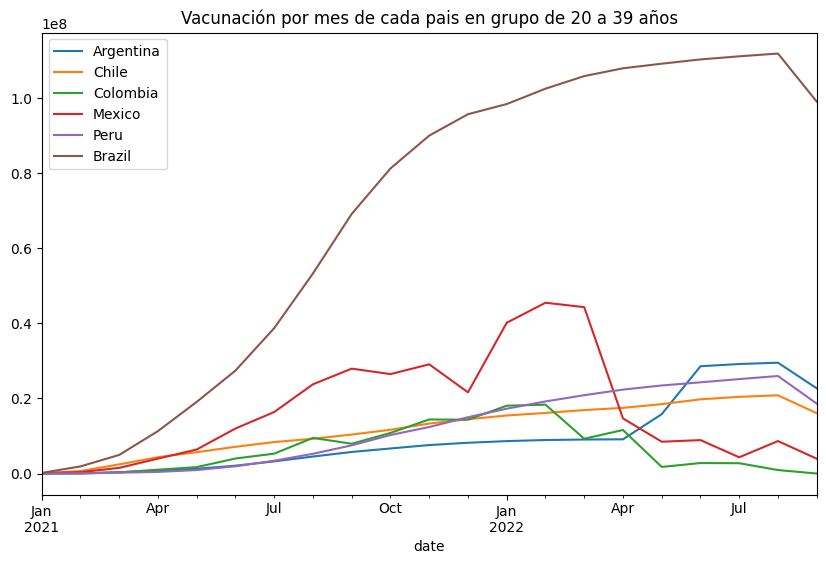

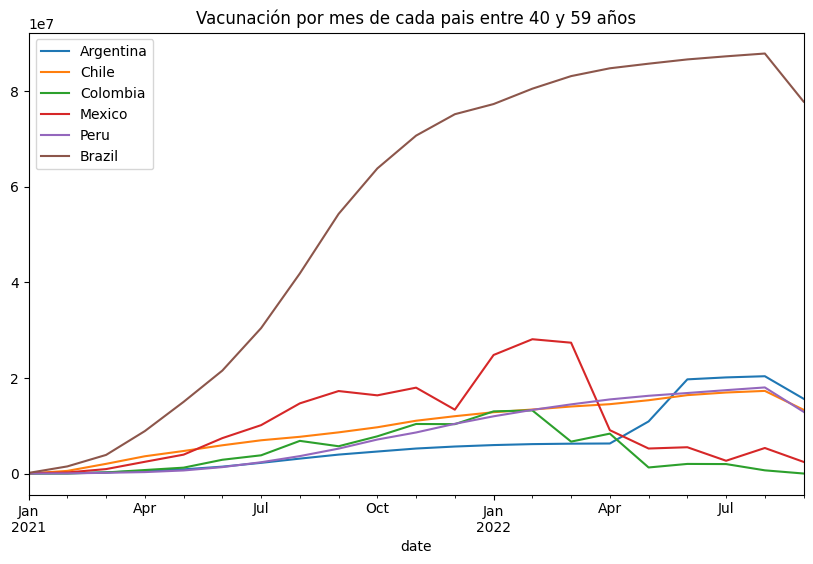

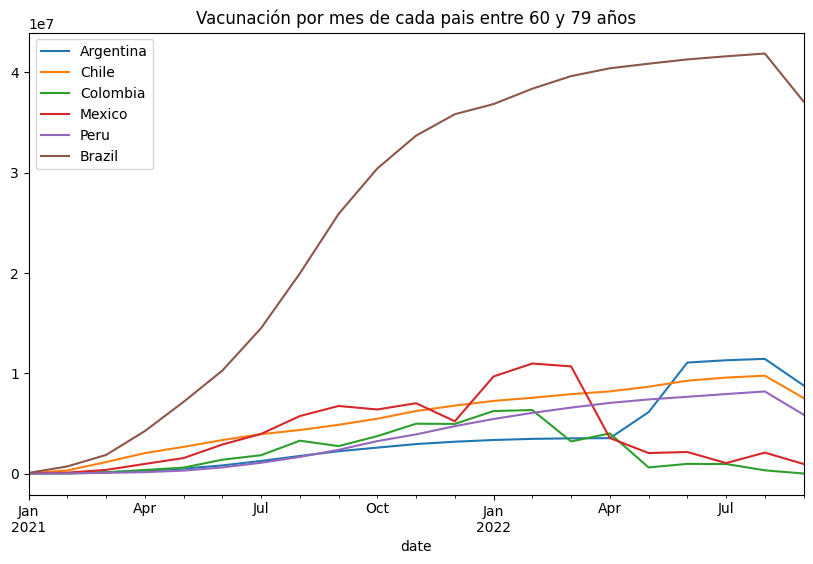

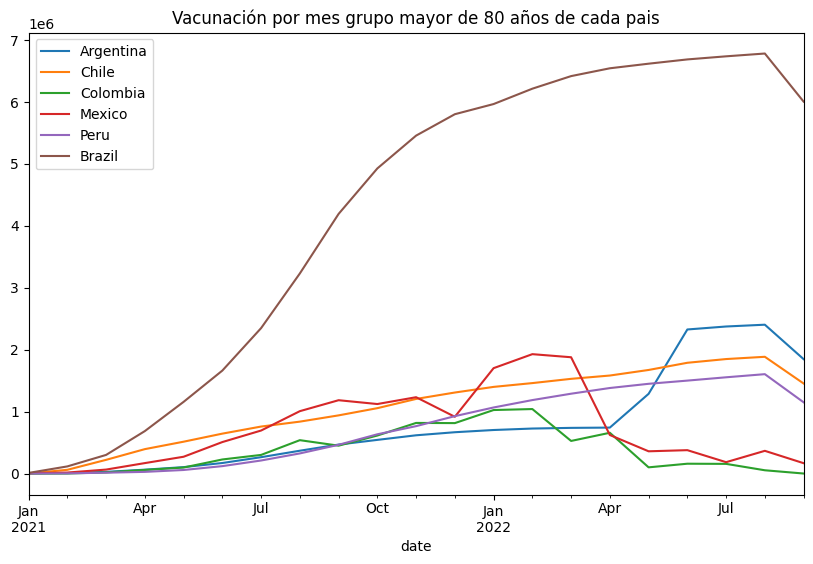

In [67]:
# Grupo etareo mas vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

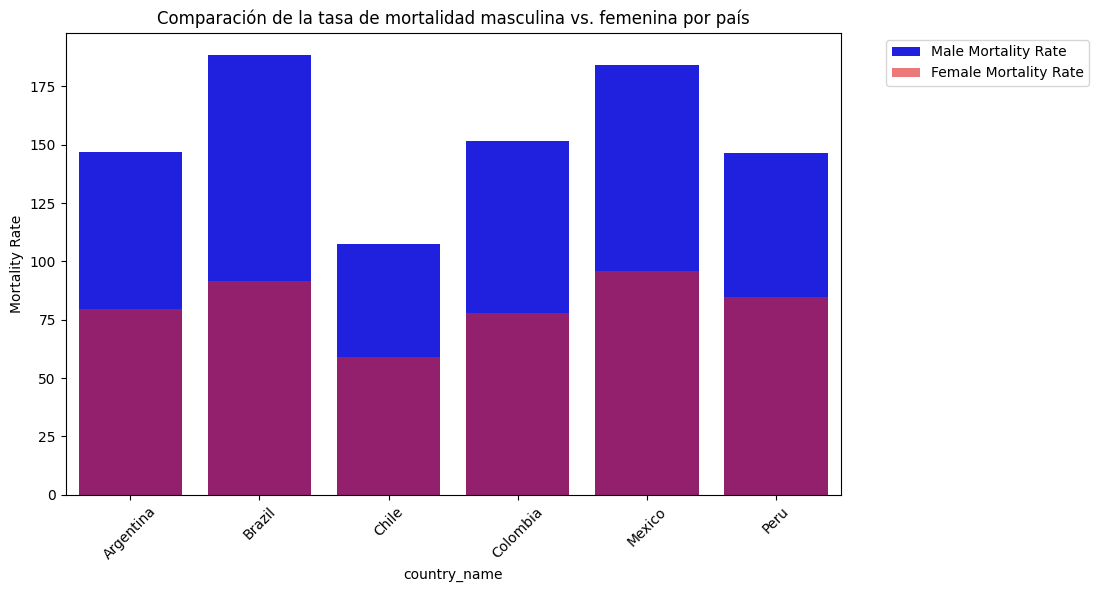

In [68]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

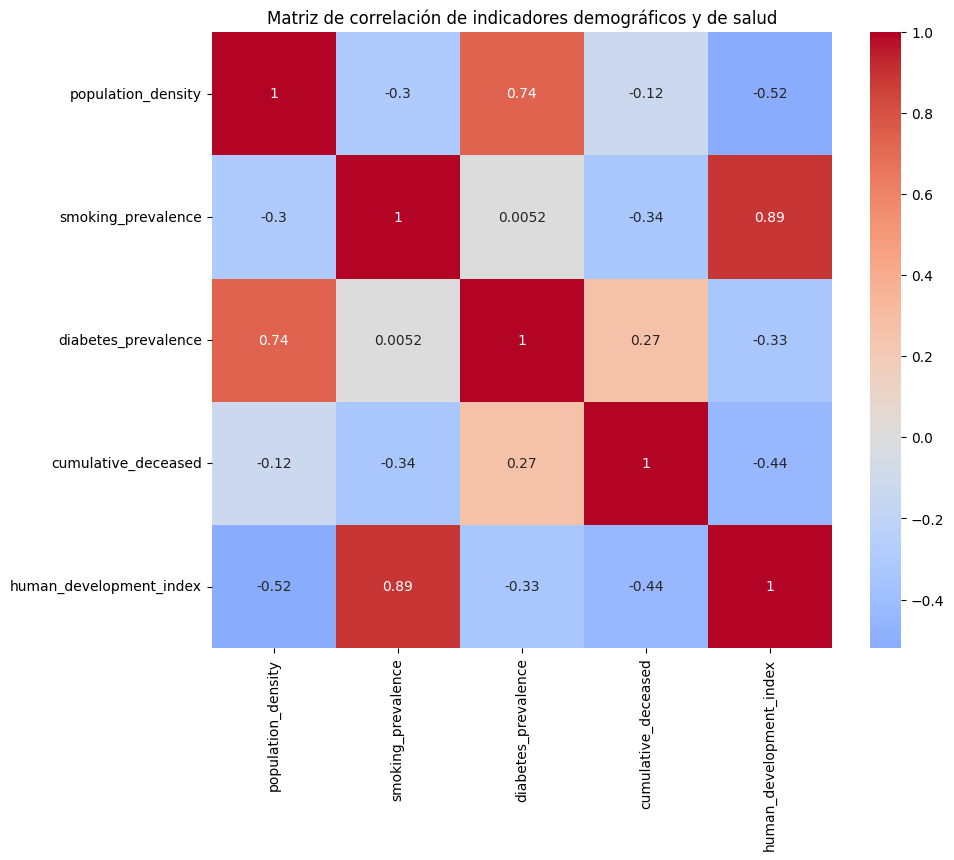

In [69]:
# Analisis de enfermedades preexistentes o comorbilidades mediante matriz de correlacion
# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

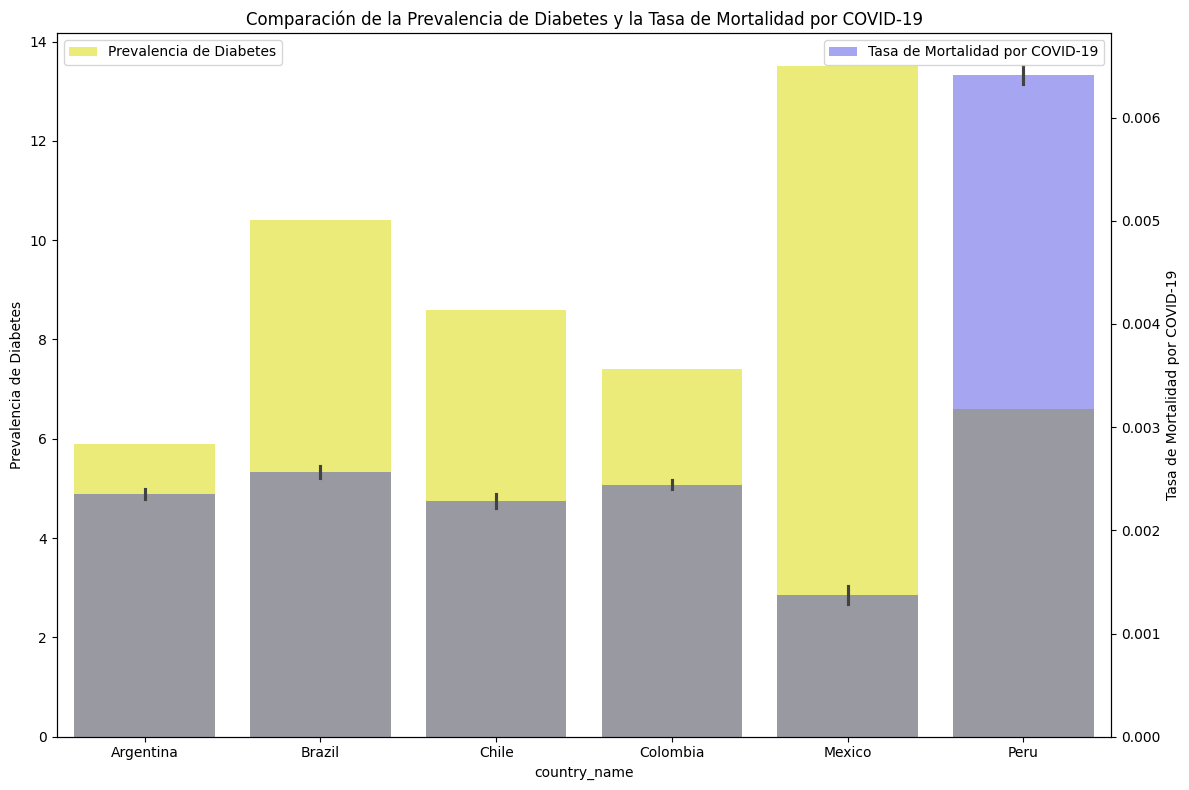

In [71]:
# Comportamiento de la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

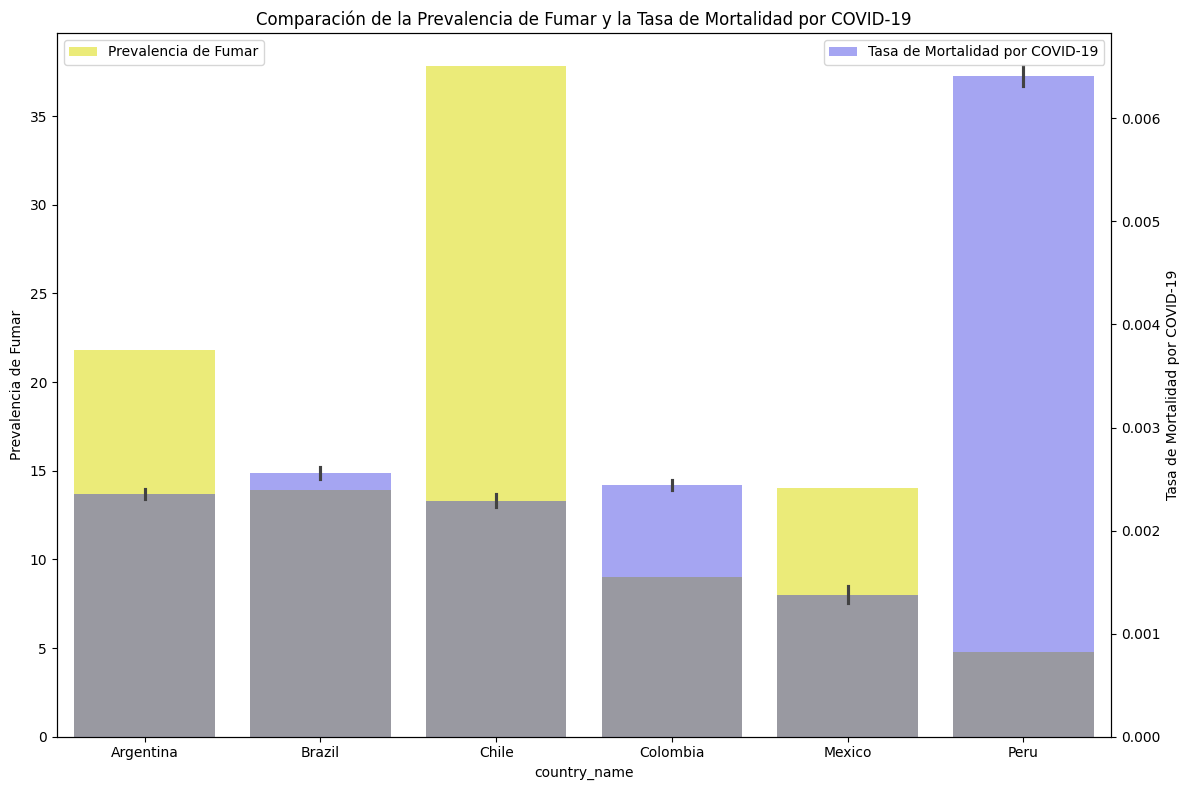

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], 
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

#### 3° avance:

In [ ]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv")
data_latinoamerica_paises.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

**Análisis exploratorio**

In [20]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [21]:
# cambio tipo de dato de "date" a datetime y lo seteo como indice
data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"])
data_latinoamerica_paises = data_latinoamerica_paises.set_index("date")
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

In [22]:
# Agrego una columna "Week" para colocar el numero de semana al que corresponde la fecha para hacer luego un analisis semanal
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02            76.52                    147.086   
2021-01-03            76.52                    147.086   
2021-01-04            76.52                    147.086   
2021-01-05            76.52                    147.086   
2021-01-06            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  \
date                                                                          
2021-01-02                        15.8            0.0                   0.0   
2021-01-03                        15.8            0.0                   0.0   
2021-01-04                        15.8            0.0                   0.0   
2021-01-05                        15.8            0.0                   0.0   
2021-01-06                        15.8            0.0                   0.0   

            week  
date              
2021-01-02    53  
2021-01-03    53  
2021-01-04     1  
2021-01-05     1  
2021-01-06     1  

[5 rows x 50 columns]

In [23]:
# agrupo los datos por año 2021 para luego hacer un análisis anual, se eligió el año 2021 porque se consideró el más crítico de la pandemia
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') & 
    (data_latinoamerica_paises.index <= '2021-12-31')
]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [24]:
# uso el dataframe anterior paraa grupar ahora por nivel de semana y por país para nuevos confirmados y muertes
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index()
weekly_cases

country_name  week  new_confirmed  new_deceased
0      Argentina     1        85321.0        1093.0
1      Argentina     2        76129.0        1191.0
2      Argentina     3        66250.0        1321.0
3      Argentina     4        58524.0        1199.0
4      Argentina     5        50576.0        1112.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        21381.0         188.0
317         Peru    53         3355.0         374.0

[318 rows x 4 columns]

In [25]:
# Verifico que estoy manejando solo los paises seleccionados
weekly_cases['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

In [26]:
import warnings

# Ignoro todos los warnings
warnings.filterwarnings("ignore")

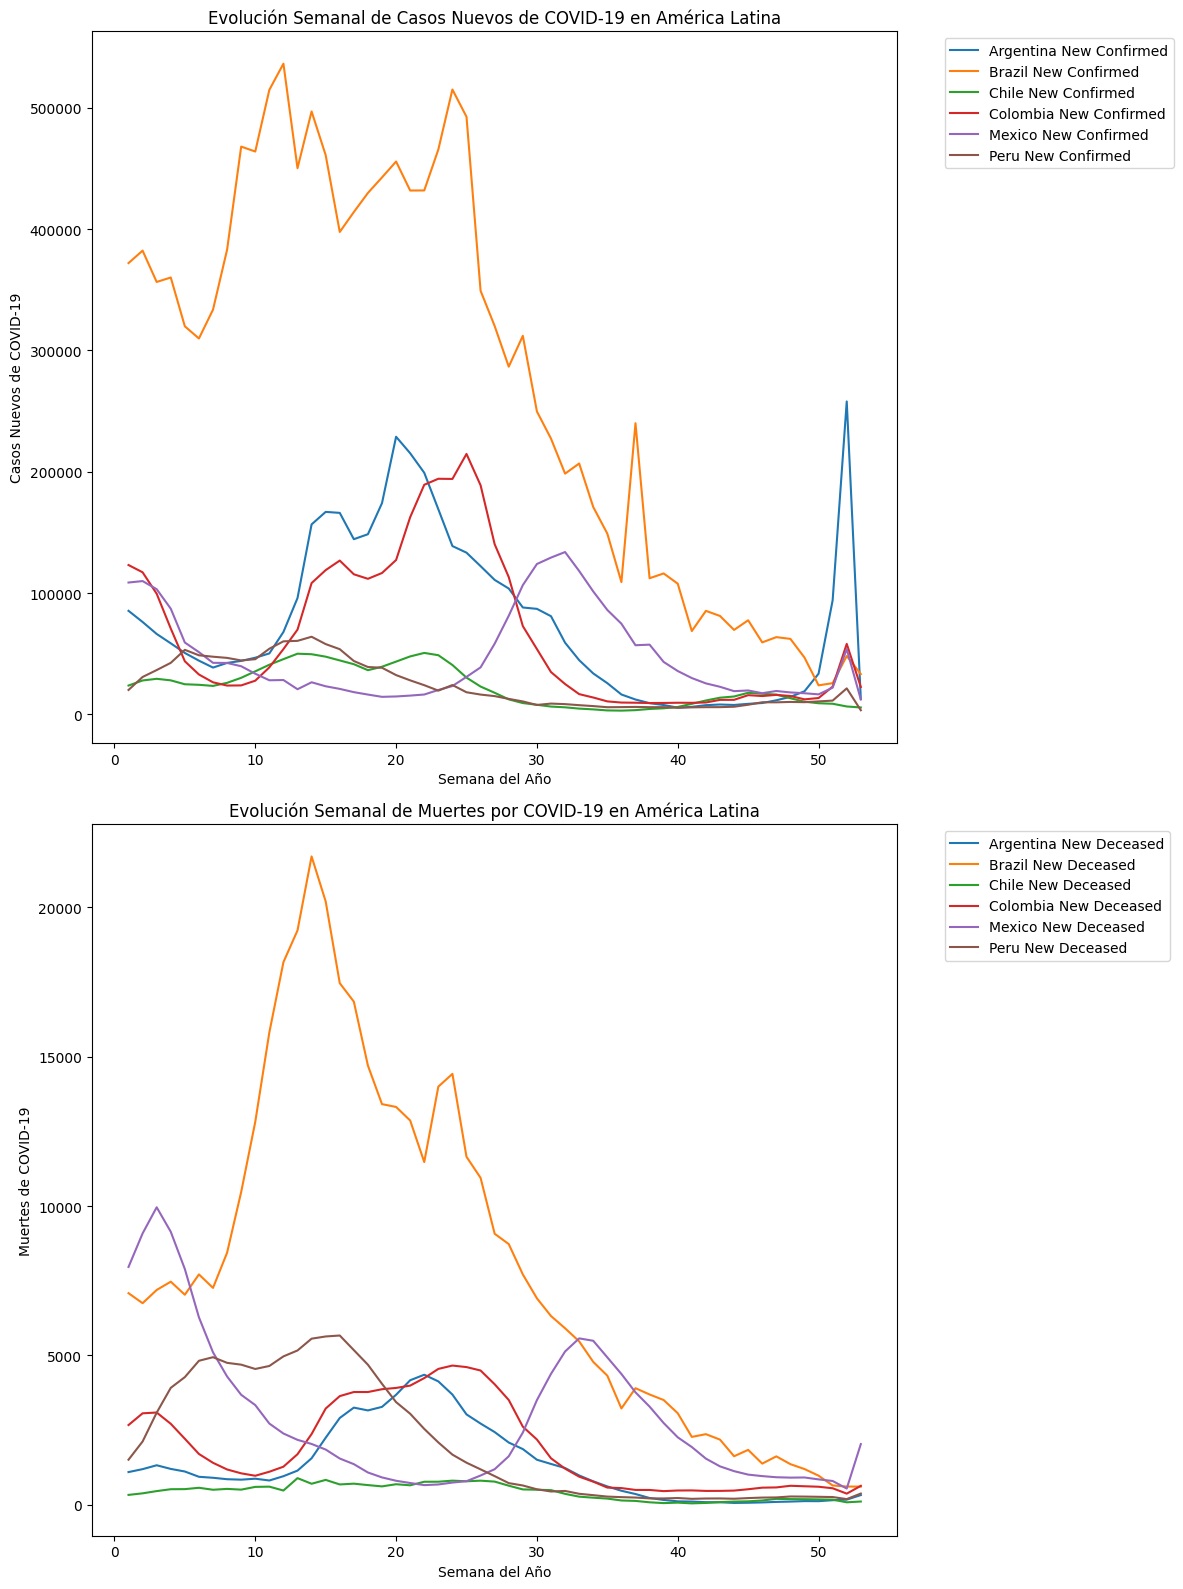

In [27]:
# Análisis de los casos de COVID-19 en América Latina a lo largo del tiempo por semana
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Semanal de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

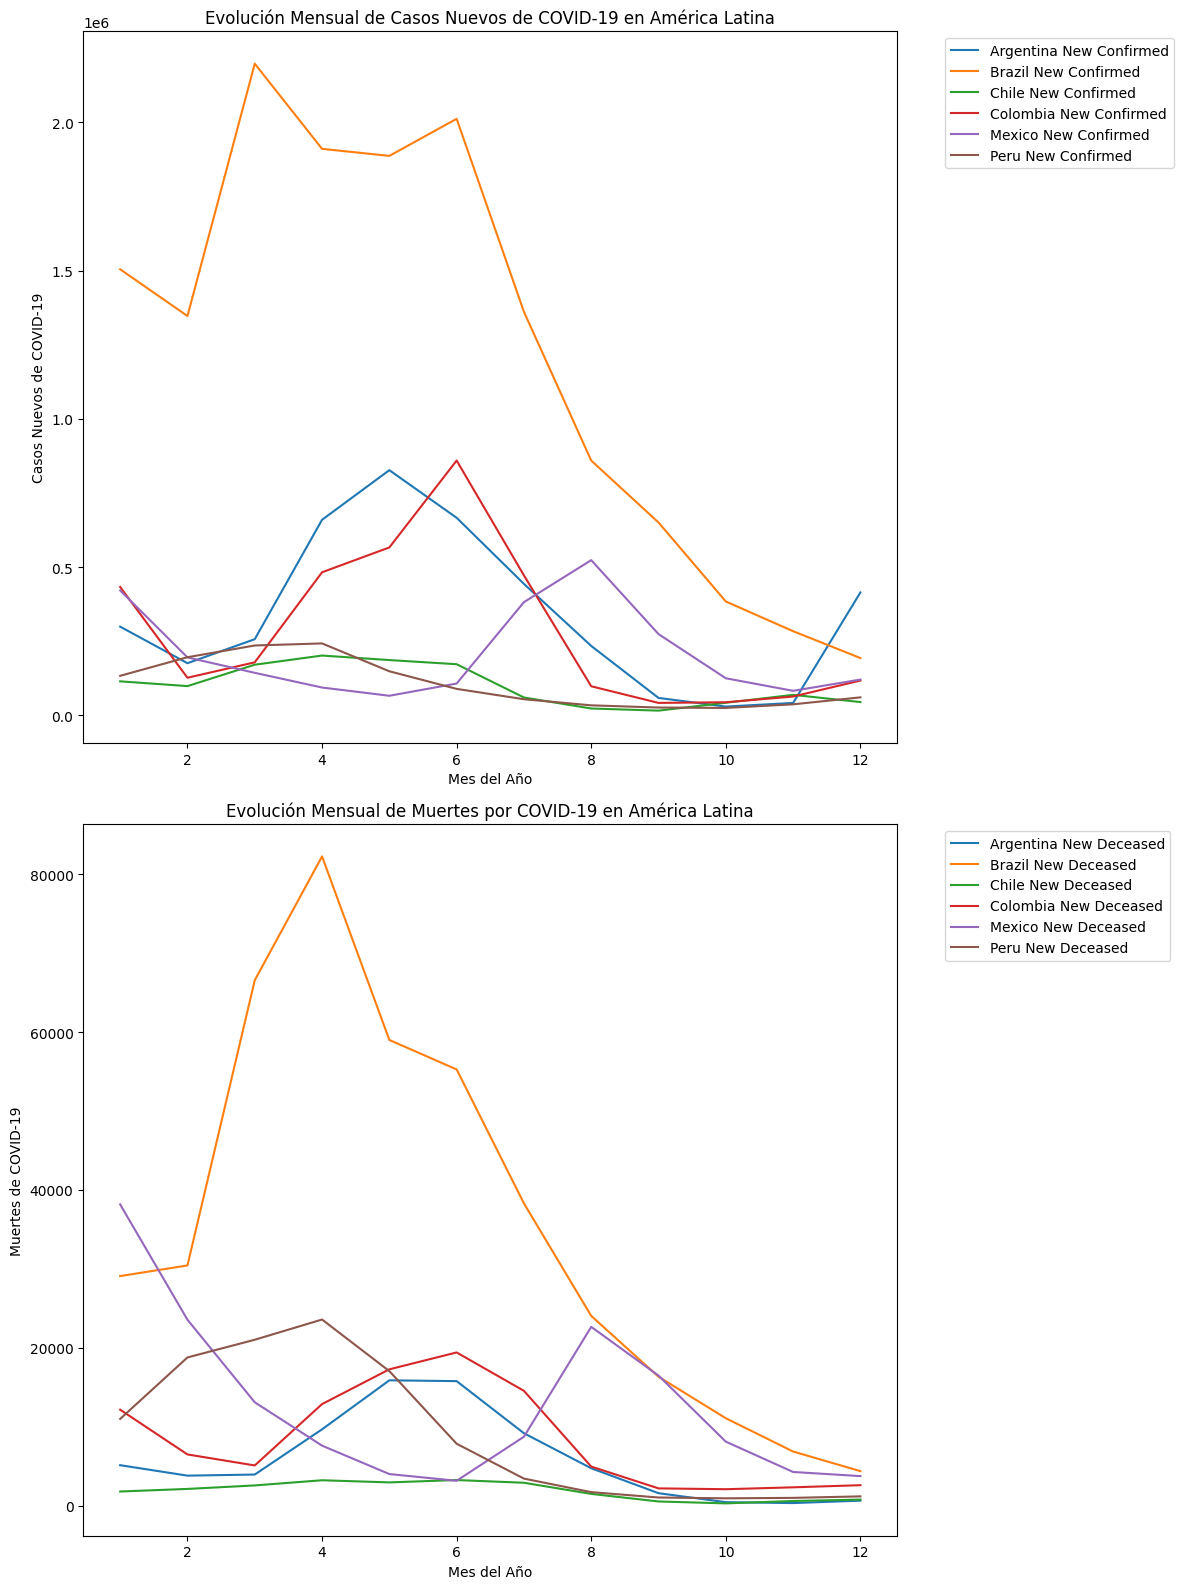

In [28]:
# Análisis mensual solo del año 2021
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month # type: ignore
yearly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**GRAFICAS ADICIONALES**

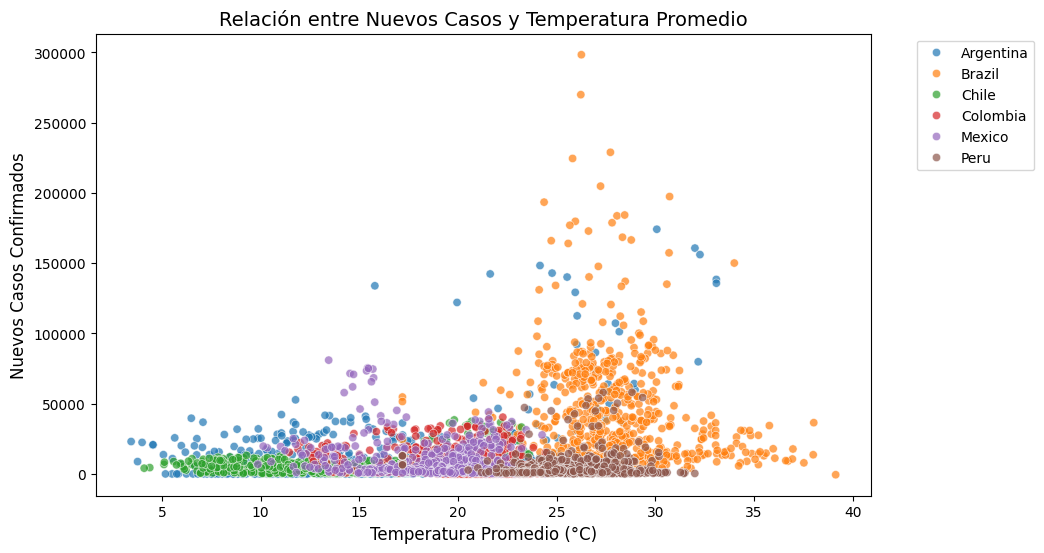

In [34]:
# Nuevos Casos y Temperatura Promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_latinoamerica_paises, x='average_temperature_celsius', y='new_confirmed', hue='country_name', alpha=0.7)
plt.title('Relación entre Nuevos Casos y Temperatura Promedio', fontsize=14)
plt.xlabel('Temperatura Promedio (°C)', fontsize=12)
plt.ylabel('Nuevos Casos Confirmados', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

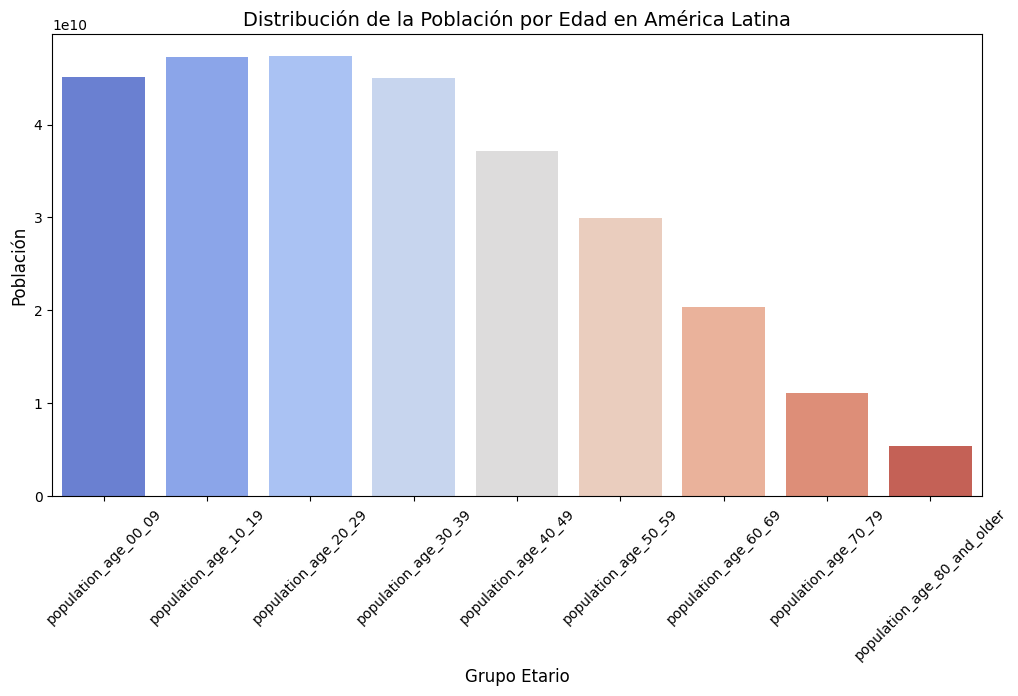

In [ ]:
# Distribución de la Población por Edad en Países
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
               'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
               'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[age_columns].sum().reset_index()
age_distribution.columns = ['Age Group', 'Population']
plt.figure(figsize=(12, 6))
sns.barplot(data=age_distribution, x='Age Group', y='Population', palette='coolwarm')
plt.title('Distribución de la Población por Edad en América Latina', fontsize=14)
plt.xlabel('Grupo Etario', fontsize=12)
plt.ylabel('Población', fontsize=12)
plt.xticks(rotation=45)
plt.show()

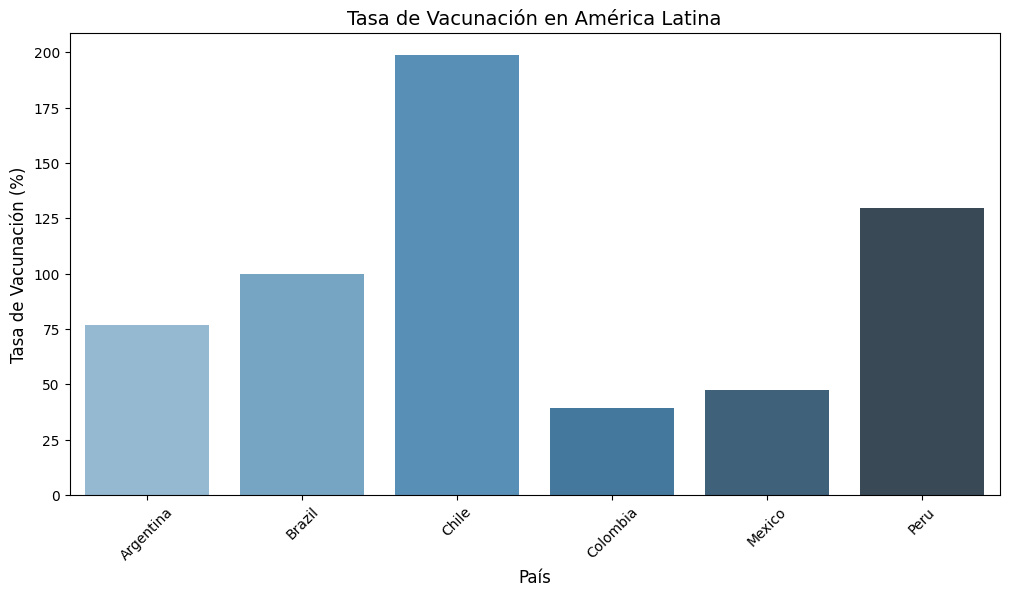

In [44]:
# Comparación de Estrategias de Vacunación en América Latina
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')[['cumulative_vaccine_doses_administered', 'population']].sum().reset_index()
vaccination_strategy['vaccination_rate'] = vaccination_strategy['cumulative_vaccine_doses_administered'] / vaccination_strategy['population'] * 100
plt.figure(figsize=(12, 6))
sns.barplot(data=vaccination_strategy, x='country_name', y='vaccination_rate', palette='Blues_d')
plt.title('Tasa de Vacunación en América Latina', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Tasa de Vacunación (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

El problema de que algunos valores de la tasa de vacunación sean mayores al 100% ocurre porque el cálculo considera el número total de dosis administradas, pero no toma en cuenta que muchas personas reciben más de una dosis (por ejemplo, esquemas de vacunación que requieren dos dosis o incluso refuerzos).

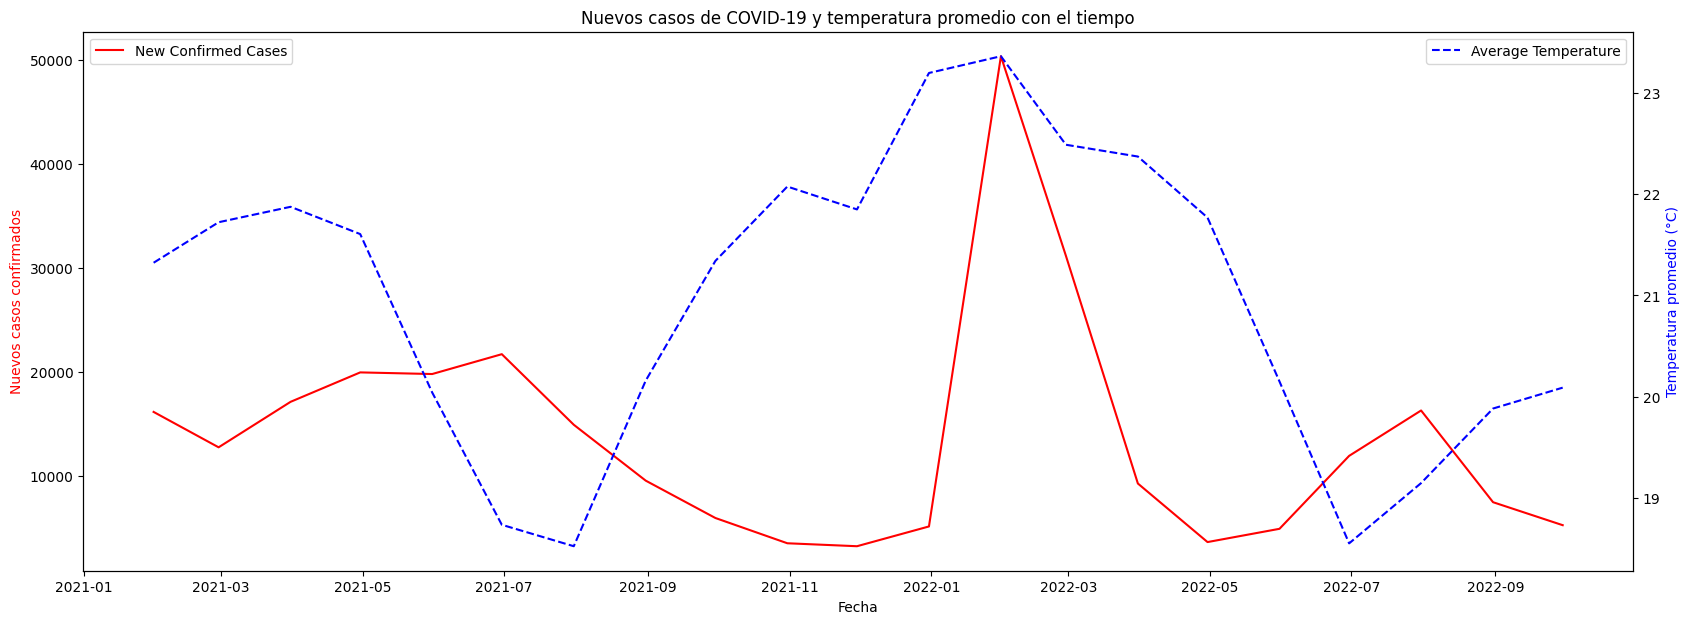

In [45]:
# Nuevos casos y temperatura promedio
plt.figure(figsize=(20, 7))
ax1 = plt.gca() # Obtiene el eje actual de la gráfica y lo asigna a ax1.
ax2 = ax1.twinx() # Crea un segundo eje ax2 que comparte el mismo eje x que ax1, permitiendo graficar dos conjuntos de datos con diferentes escalas y unidades en el mismo gráfico.
ax1.plot(data_latinoamerica_paises.resample('M').mean(numeric_only=True).index, data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_paises.resample('M').mean(numeric_only=True).index, data_latinoamerica_paises.resample('M').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Se observa que la temperatura promedio va aumentando y los casos confirmados disminuyendo, sin embargo hubo un pico antes del mes de marzo pero disminuyó rápidamente, esto puede ser por la cantidad de vacunas administradas.

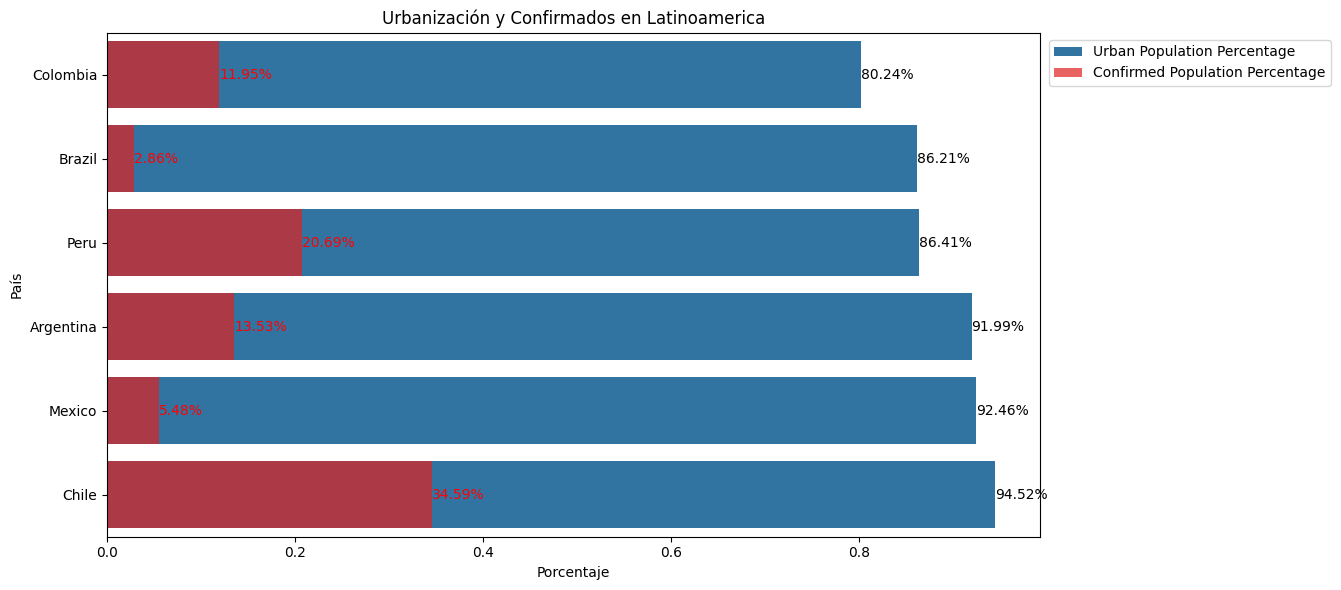

In [10]:
# - Impacto de la Urbanización en la Propagación del Covid-19: Urbanización en Latinoamerica
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='urban_population_percentage', y=urban_cases.index, data=urban_cases, label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x='confirmed_population_percentage', y=urban_cases.index, data=urban_cases, alpha=0.7, label='Confirmed Population Percentage', color='red')

# Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', color='red', ha="left", va="center")

plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()


Aunque anteriormente se observó que Chile tuvo la tasa más alta de vacunación, en este uultimo grafico se observa que tuvo el mayor porcentaje de casos confirmados, ésto puede deberse a:
- Los países con mayor porcentaje de población urbana suelen tener una mayor transmisión del virus, y Chile tiene una alta proporción de su población viviendo en áreas urbanas.
- El porcentaje de vacunación alto puede no haber coincidido con el inicio del brote en Chile. Si el virus ya se había propagado ampliamente antes de alcanzar un alto nivel de vacunación, la tasa de casos confirmados habría sido más alta.
- Chile implementó una estrategia de pruebas amplia y eficiente, lo que podría haber resultado en la identificación de una mayor proporción de casos confirmados en comparación con otros países, donde los casos pueden haber sido subestimados.

In [57]:
data_latinoamerica_paises.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  life_expectancy  adult_male_mortality_rate  \
date                         ...                                               
2021-01-02       19523766.0  ...            76.52                    147.086   
2021-01-03       19523766.0  ...            76.52                    147.086   
2021-01-04       19523766.0  ...            76.52                    147.086   
2021-01-05       19523766.0  ...            76.52                    147.086   
2021-01-06       19523766.0  ...            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  \
date                                                                          
2021-01-02                        15.8            0.0                   0.0   
2021-01-03                        15.8            0.0                   0.0   
2021-01-04                        15.8            0.0                   0.0   
2021-01-05                        15.8            0.0                   0.0   
2021-01-06                        15.8            0.0                   0.0   

            week  urban_population_percentage  confirmed_population_percentage  
date                                                                            
2021-01-02    53                      0.91991                         0.037176  
2021-01-03    53                      0.91991                         0.037286  
2021-01-04     1                      0.91991                         0.037596  
2021-01-05     1                      0.91991                         0.037910  
2021-01-06     1                      0.91991                         0.038232  

[5 rows x 52 columns]

In [59]:
data_latinoamerica_paises['deceased_percentage'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  adult_male_mortality_rate  \
date                         ...                              
2021-01-02       19523766.0  ...                    147.086   
2021-01-03       19523766.0  ...                    147.086   
2021-01-04       19523766.0  ...                    147.086   
2021-01-05       19523766.0  ...                    147.086   
2021-01-06       19523766.0  ...                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  \
date                                                                          
2021-01-02                        15.8            0.0                   0.0   
2021-01-03                        15.8            0.0                   0.0   
2021-01-04                        15.8            0.0                   0.0   
2021-01-05                        15.8            0.0                   0.0   
2021-01-06                        15.8            0.0                   0.0   

            week  urban_population_percentage  \
date                                            
2021-01-02    53                      0.91991   
2021-01-03    53                      0.91991   
2021-01-04     1                      0.91991   
2021-01-05     1                      0.91991   
2021-01-06     1                      0.91991   

            confirmed_population_percentage  deceased_percentage  
date                                                              
2021-01-02                         0.037176             0.001039  
2021-01-03                         0.037286             0.001042  
2021-01-04                         0.037596             0.001046  
2021-01-05                         0.037910             0.001049  
2021-01-06                         0.038232             0.001052  

[5 rows x 53 columns]

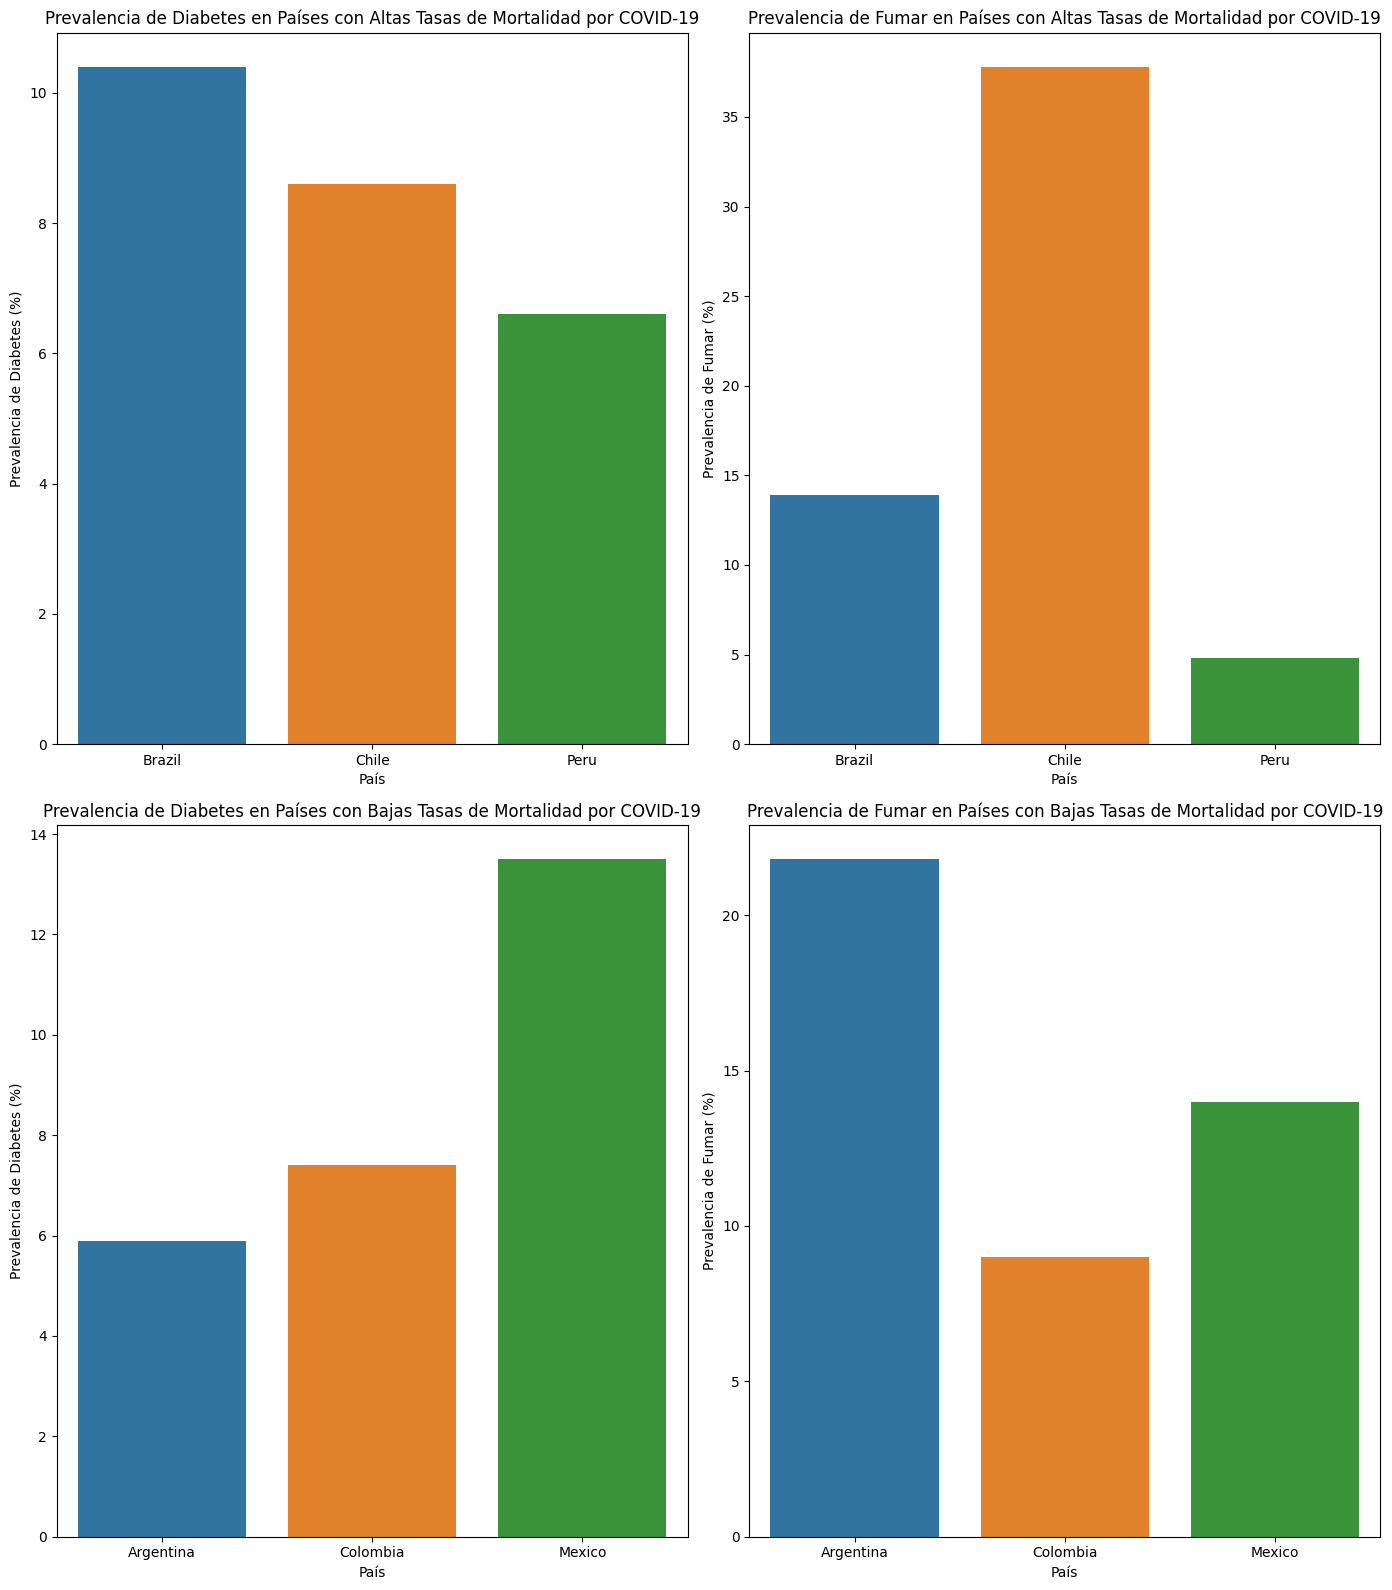

In [60]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

Se observa que la diabetes afecta mucho mas a México y Brasil, por lo que se podría decir que estos paises son los que más han sufrido por la diabetes. Respecto a fumar se puede observar que afecta más a Chile y Argentina.

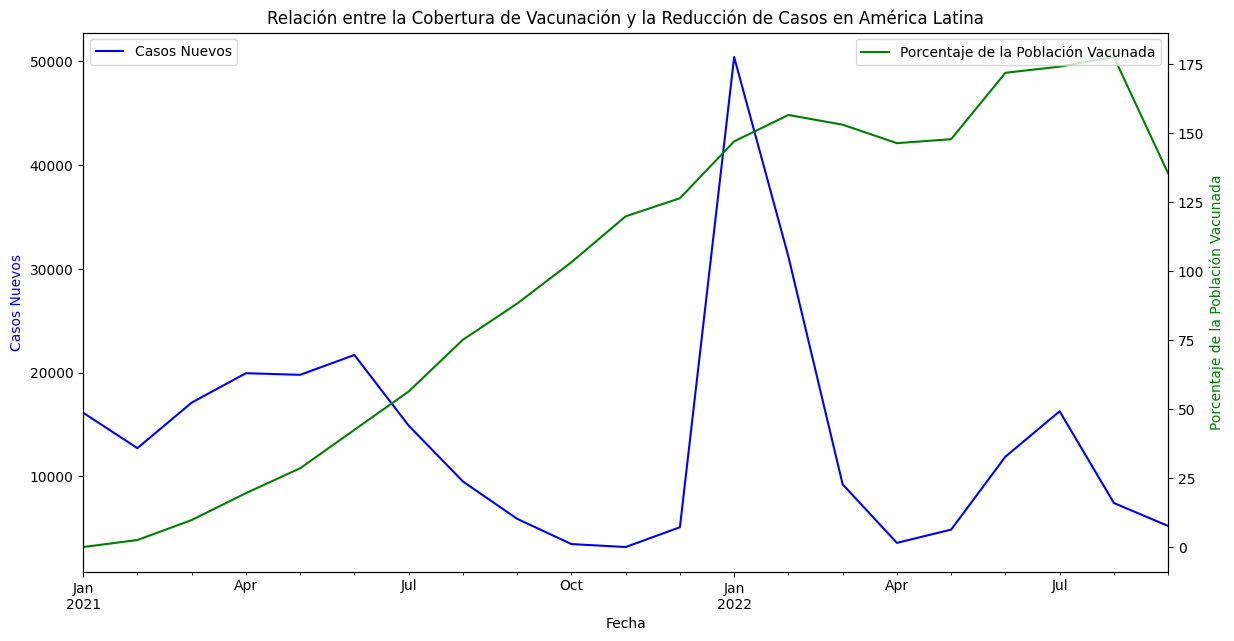

In [62]:
# Evolución de la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Gráfico mis dos lineplots
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Se observa que a medida que se fue vacunando más personas, los nuevos casos de  fueron disminuyendo.

**EXTRA CREDIT**

In [63]:
! pip install geopandas
! pip install geodatasets

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached pyproj-3.7.0-cp311-cp311-win_amd64.whl.metadata (31 kB)
  Using cached shapely-2.0.6-cp311-cp311-win_amd64.whl.metadata (7.2 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached pyogrio-0.10.0-cp311-cp311-win_amd64.whl (16.2 MB)
Using cached pyproj-3.7.0-cp311-cp311-win_amd64.whl (6.2 MB)
Using cached shapely-2.0.6-cp311-cp311-win_amd64.whl (1.4 MB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\mariu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached geodatasets-2024.8.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
Using cached geodatasets-2024.8.0-py3-none-any.whl (20 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\mariu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
! pip freeze > requirements.txt

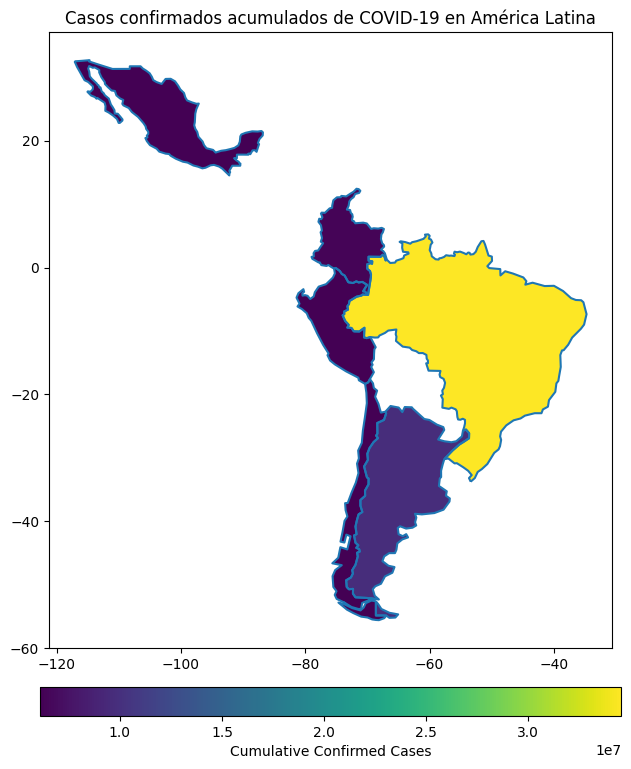

In [71]:
# Mapa de casos acumulados confirmados en latinoamerica
import geopandas as gpd

# Path del Geo Dataframe descargado desde: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
path = "C:/Users/mariu/Documents/DataAnalyst Henry/M4Python/.clase_8_venv/ne_110m_admin_0_countries.zip"

# Cargo el dataset con el archivo
world = gpd.read_file(path)

# Filtrado de world: 
world = world[(world.NAME=="Argentina") | (world.NAME=="Chile") | (world.NAME=="Colombia") | (world.NAME=="Mexico") | (world.NAME=="Peru") | (world.NAME=="Brazil")]

world = world.rename(columns={"NAME":"country_name"})
world["country_name"]

# Unir los datos de COVID-19 con los datos geoespaciales
world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()

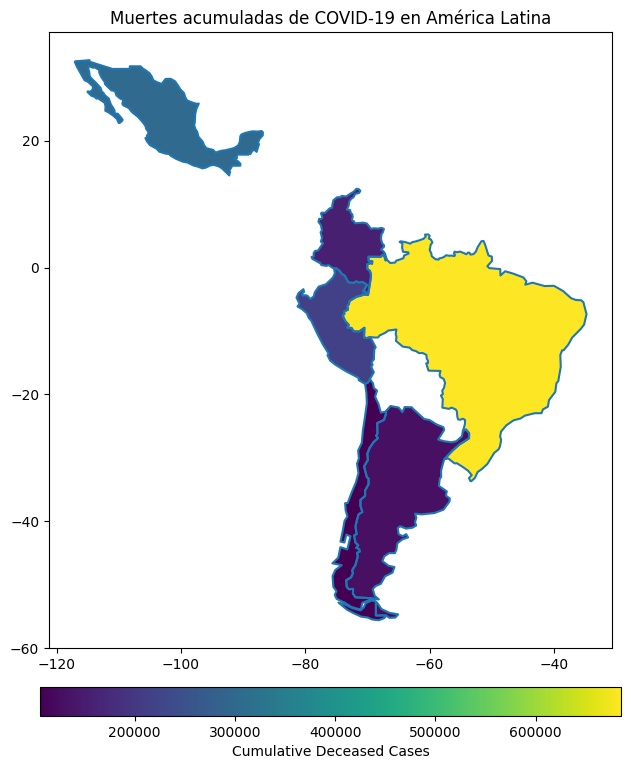

In [72]:
# Mapa de la distribución de muertes en latinoamerica

world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_deceased', ax=ax, legend=True, legend_kwds={'label': "Cumulative Deceased Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Muertes acumuladas de COVID-19 en América Latina')
plt.show()

En ambos mapas se observa que Brasil es el país de latinoamérica con mayor número de casos confirmados y de muertes por COVID-19.